# Final EDA 


- data in `'data_after_final_EDA.csv'`


### `Final features:`

`Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'hesitant_unsure', 'hesitant_strongly', 'SVI', 'SVI_cat',
       'CVAC', 'CVAC_cat', 'Hispanic (%)',
       'non-Hispanic American Indian/Alaska Native (%)',
       'non-Hispanic Asian (%)', 'non-Hispanic Black (%)',
       'non-Hispanic Native Hawaiian/Pacific Islander (%)',
       'non-Hispanic White (%)', 'noHealthInsurance', 'noHighSchool',
       'Poverty', 'SES', 'WBSeg', 'WNWSeg', 'pop_census', 'logPopDensity',
       'Urban_rural_code', 'PrematureDeath', 'Smoking',
       'anycondition_prevalence', 'Obesity_prevalence',
       'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence',
       'CKD_prevalence', 'per_dem', 'per_voted', 'Testing', 'Traffic',
       'DaytimePopDensity', 'ToxPi Score'],
      dtype='object')`
      
      
### `Dropped features`:

- `'death_rate'`         - in favour of `'death_prop'` and `'cases_prop'`
- `'Estimated hesitant'` - in favour of `'Estimated hesitant or unsure', 'Estimated strongly hesitant'`
- `'per_point_diff','per_gop'` - in favour of `'per_dem'` + `'per_voted'`
- `'HouseholdSize','Household','HousingType','PercentEduHealthSoc','EconArea'` - no association with vaccination rate.
- `'Asthma','Cancer','Male'`  - no correlation with vaccination rate.
- `'PctGE65'`                  - no correlation with vaccination rate.
- `'RuralCont', 'DistancingGrade'` - in favour of `'Urban_rural_code'`, which has more categories.  


### `Features to further discuss`:

- `'WBSeg','WNWSeg'` - index available for a fraction of the counties.
- `'SVI Category'`       - categorical, should only keep conitinuous?
- `'CVAC Level Of Concern'`    - categorical, should only keep continuous?
- `*_prevalence` - highly correlated, which to keep?
- `'Testing','Traffic','DaytimePopDensity', 'ToxPi Score'` - daily indices
- `'SVI','noHealthInsurance','noHighSchool','Poverty','SES'` - highly correlated with each other.
- `'pop_census', 'logPopDensity','DaytimePopDensity'` - highly correlated.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base = os.path.split(os.getcwd())[0]
dd = base + '/data/'

In [3]:
df = pd.read_csv(dd + 'data_after_initial_EDA.csv')

In [4]:
df.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'death_rate', 'pop_census', 'Estimated hesitant',
       'Estimated hesitant or unsure', 'Estimated strongly hesitant',
       'Social Vulnerability Index (SVI)', 'SVI Category',
       'CVAC level of concern for vaccination rollout',
       'CVAC Level Of Concern', 'Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White', 'total_votes', 'per_dem', 'per_gop',
       'per_point_diff', 'PrematureDeath', 'Smoking', 'Testing', 'Traffic',
       'DistancingGrade', 'DaytimePopDensity', 'PctGE65', 'ToxPi Score',
       'Male', 'RuralCont', 'EconArea', 'HouseholdSize', 'noHealthInsurance',
       'noHighSchool', 'Poverty', 'logPopDensity', 'PercentEdu

### Heatmap:

`['DistancingGrade','RuralCont', 'Urban_rural_code']` to int.

In [5]:
for col in ['DistancingGrade','RuralCont', 'Urban_rural_code']:
    df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 59 columns):
fips                                                     3137 non-null int64
state                                                    3137 non-null object
county                                                   3137 non-null object
state_abb                                                3137 non-null object
pop_full_12plus_per                                      3084 non-null float64
pop_full_18plus_per                                      2875 non-null float64
pop_full_65plus_per                                      3129 non-null float64
cases_prop                                               3110 non-null float64
death_prop                                               3082 non-null float64
death_rate                                               3082 non-null float64
pop_census                                               3137 non-null float64
Estimated hesitant           

In [6]:
full_corr = df.select_dtypes(include=['float64']).corr(method = 'spearman')
corr_03 = full_corr.where(-((full_corr < 0.3) & (full_corr > -0.3)))
corr_04 = full_corr.where(-((full_corr < 0.4) & (full_corr > -0.4)))
corr_02 = full_corr.where(-((full_corr < 0.2) & (full_corr > -0.2)))

(50.0, 0.0)

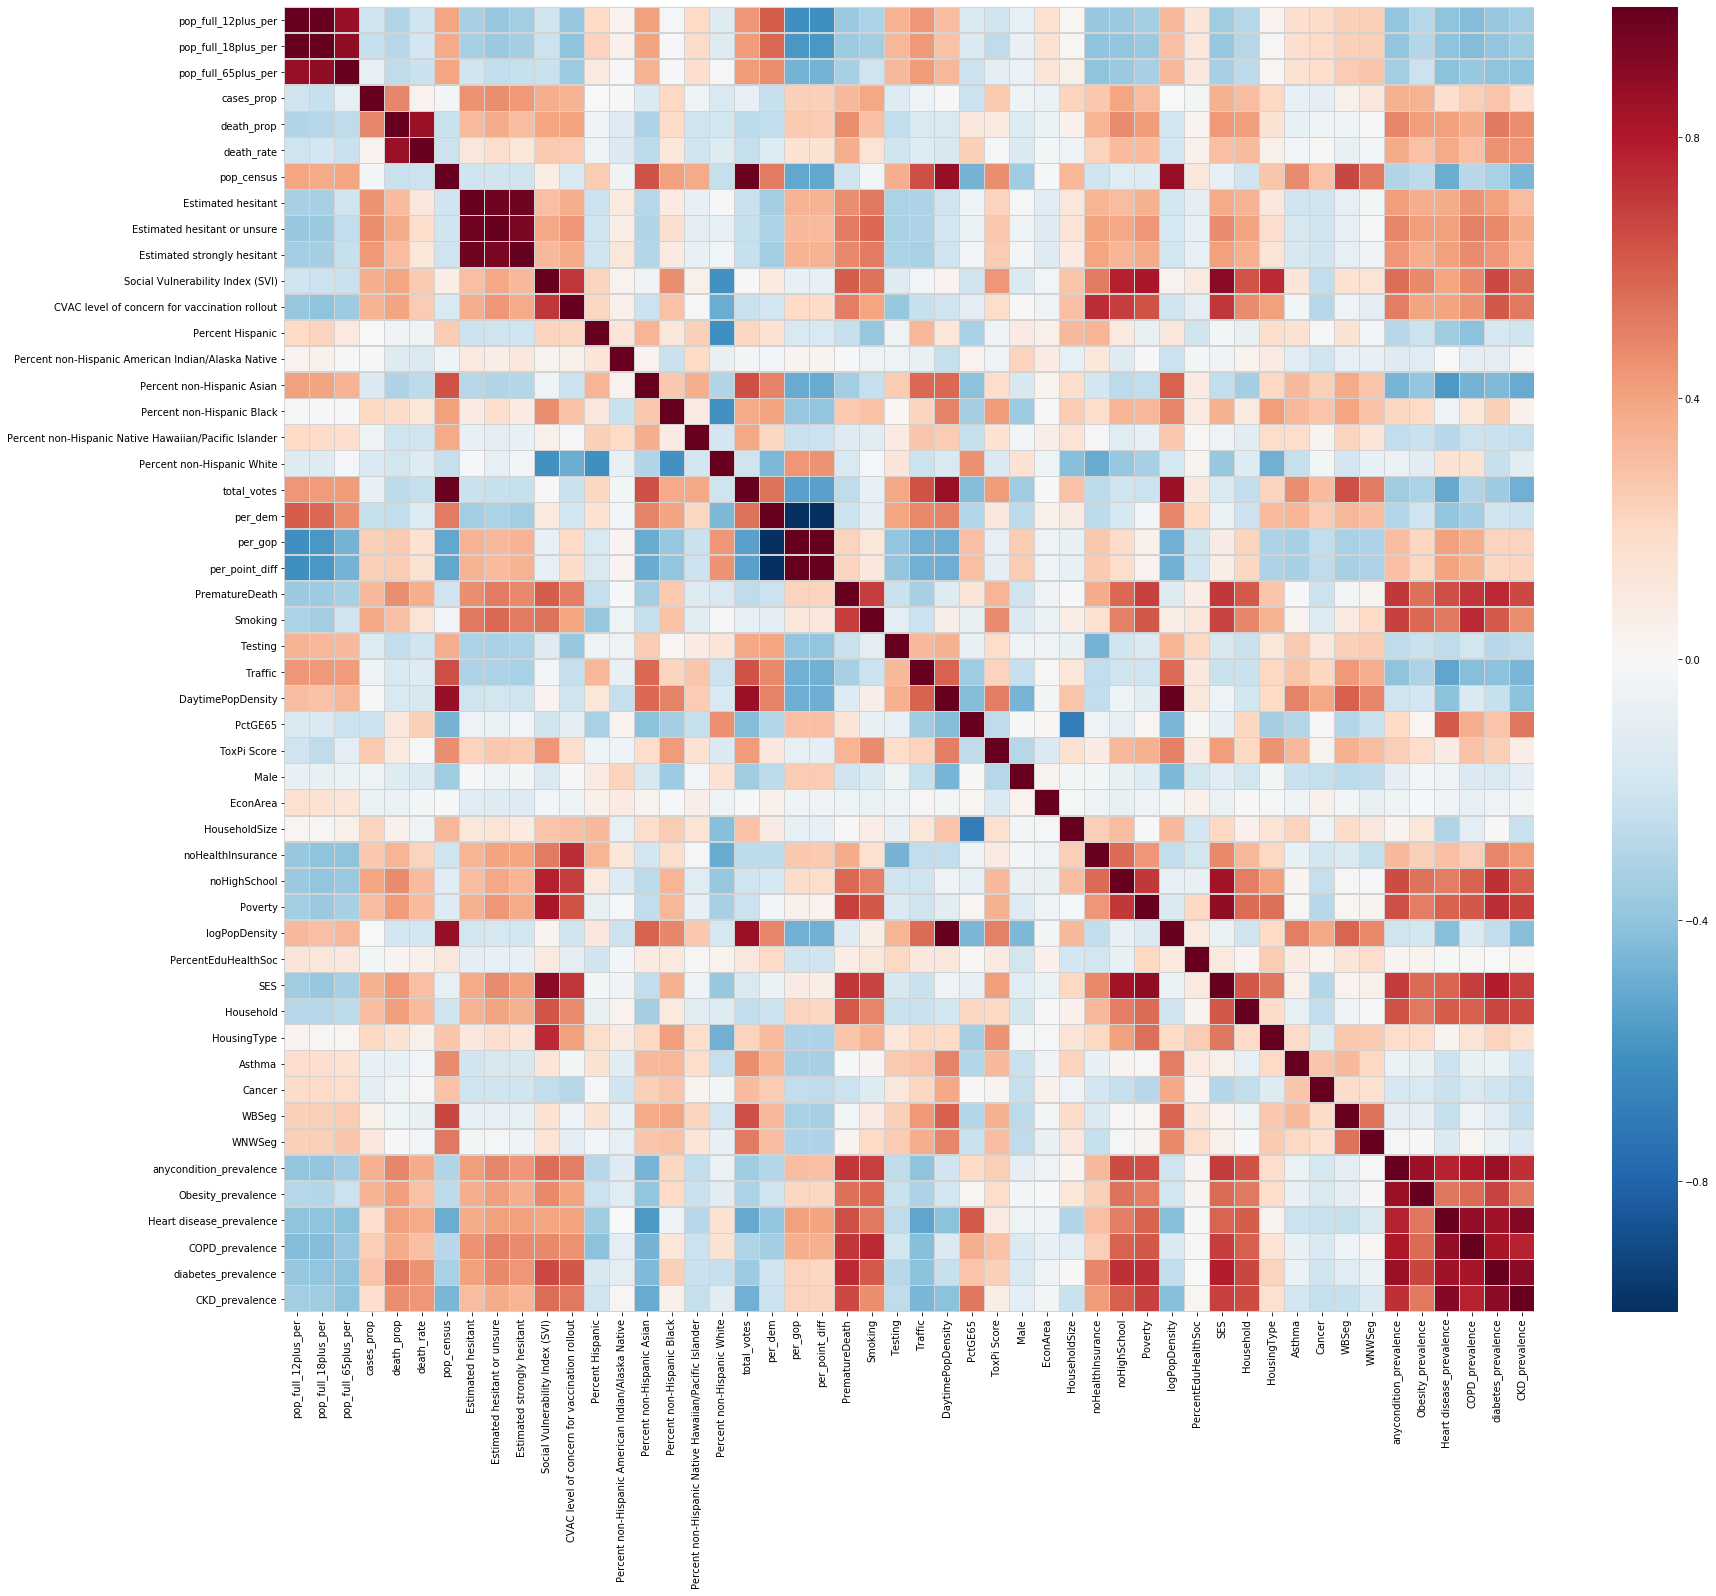

In [7]:
plt.figure(figsize=(28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [8]:
print(full_corr[full_corr['pop_full_12plus_per'] > 0.2]['pop_full_12plus_per'])
print(full_corr[full_corr['pop_full_12plus_per'] < -0.2]['pop_full_12plus_per'])

pop_full_12plus_per           1.000000
pop_full_18plus_per           0.998140
pop_full_65plus_per           0.873957
pop_census                    0.393830
Percent non-Hispanic Asian    0.413728
total_votes                   0.441268
per_dem                       0.609006
Testing                       0.351668
Traffic                       0.440394
DaytimePopDensity             0.311812
logPopDensity                 0.320794
WBSeg                         0.240008
WNWSeg                        0.238139
Name: pop_full_12plus_per, dtype: float64
cases_prop                                      -0.207887
death_prop                                      -0.299909
death_rate                                      -0.209791
Estimated hesitant                              -0.333582
Estimated hesitant or unsure                    -0.374811
Estimated strongly hesitant                     -0.344389
CVAC level of concern for vaccination rollout   -0.384770
per_gop                                      

(50.0, 0.0)

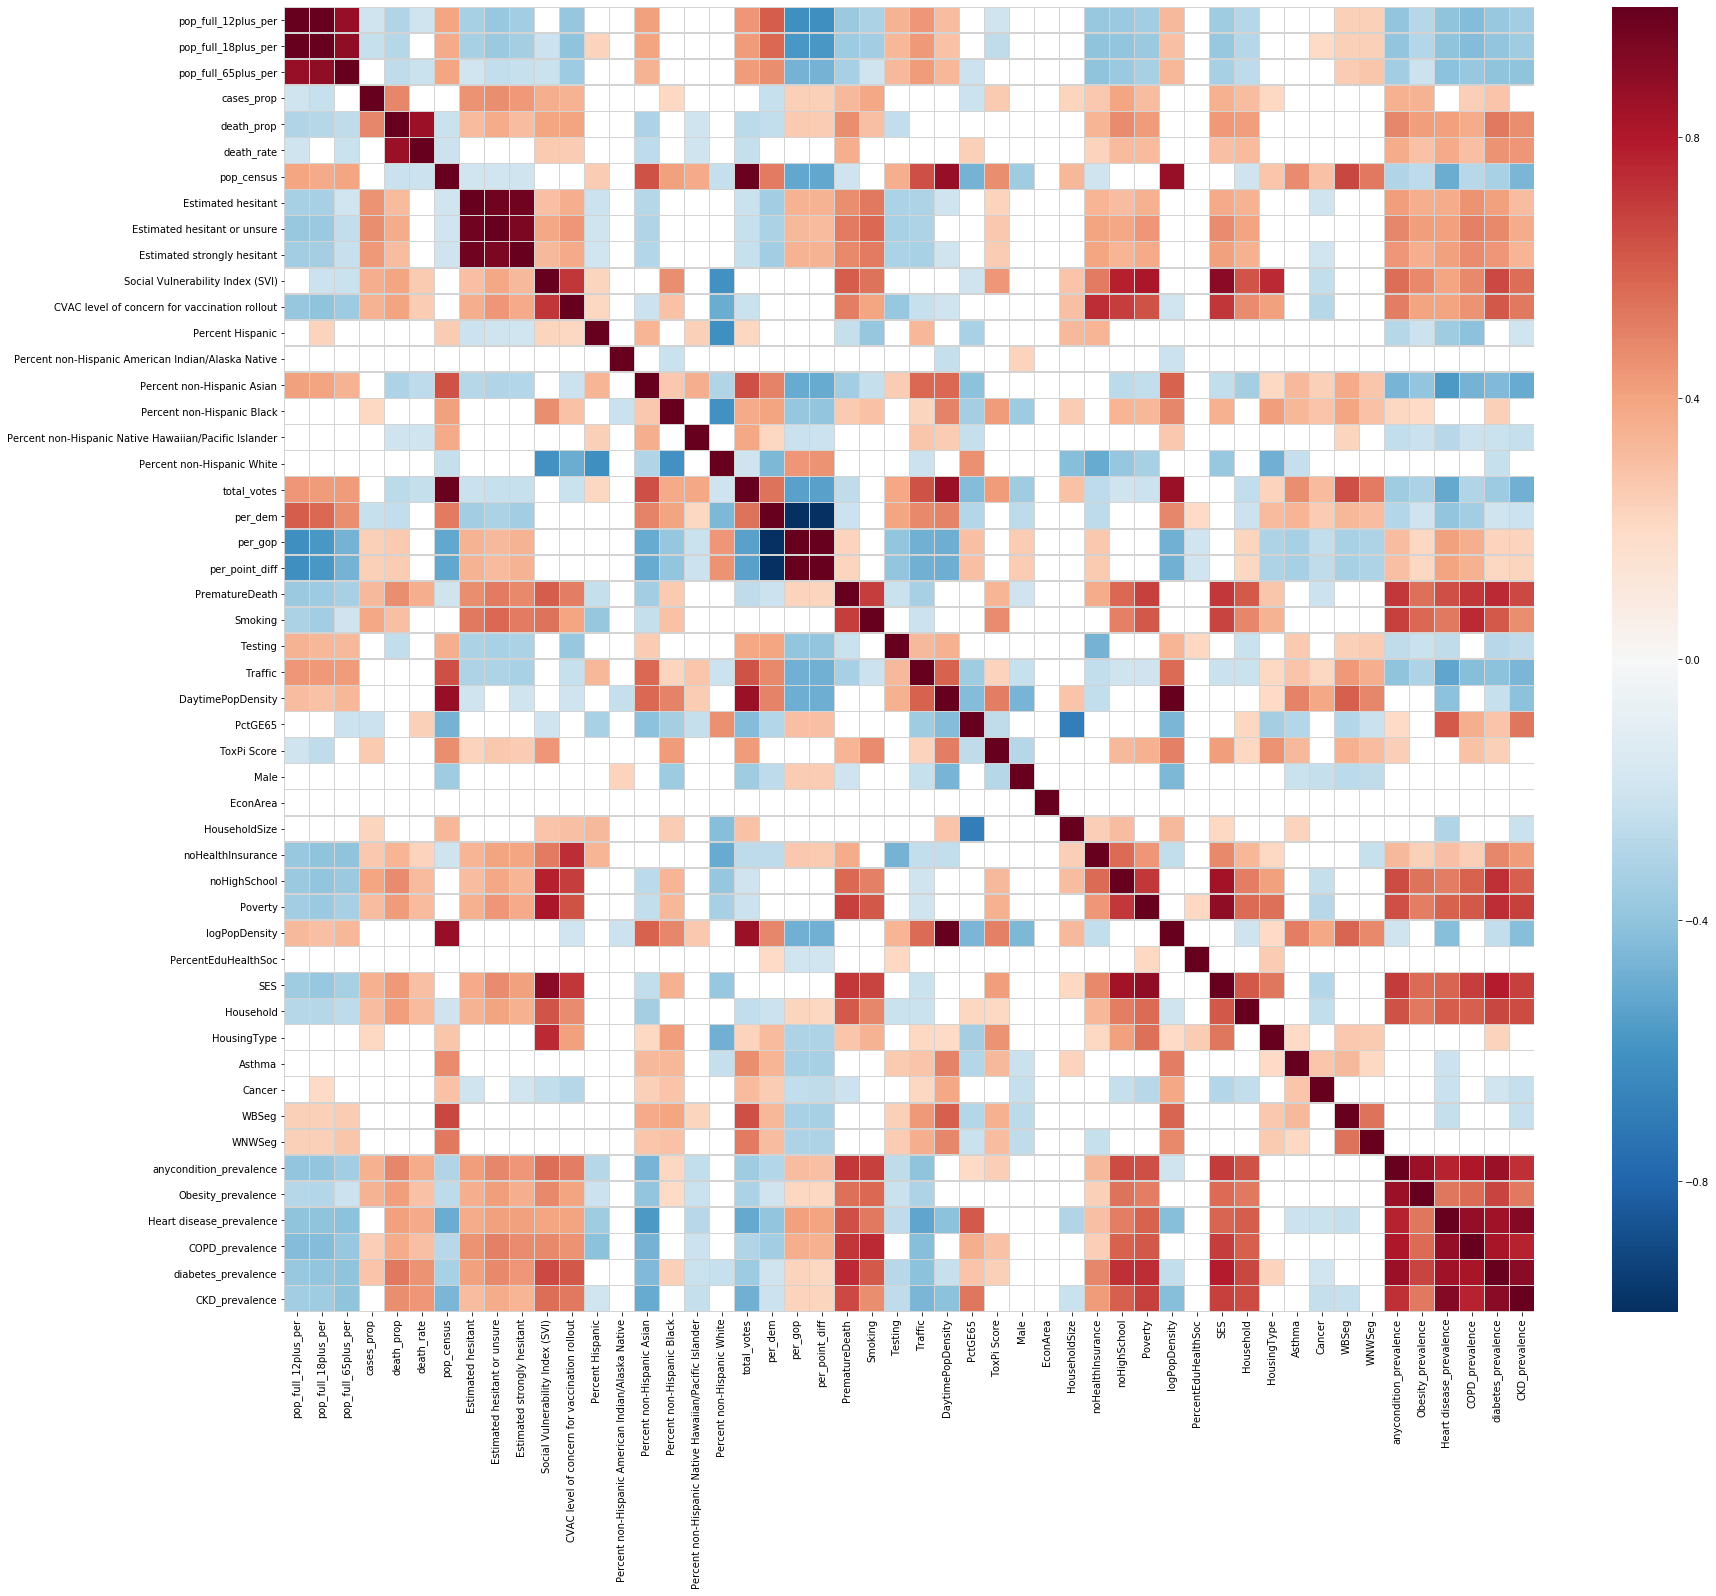

In [9]:
plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(corr_02, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Overall first `conclusions`:

- covid19 severity e.g., cases, deaths, death rate did not show a strong correlation with vaccination rates.
- SVI did not show a strong correlation with vaccination rates. 
- from the ethnic background features, only percent non-hispanic asian population showed a positive correlation with vaccination rates. 
- there were strong association between election results and vaccination rates, but features were highly correlated with each other, and therefore, per_dem will be kept only. 
- household information did not correlate with vaccination rates. 
- Segregation indices did not correlate with vaccination rates. (but might show interesting results as a post hoc analysis). 
- from medical condition data: asthma, cancer, obesity di not show a correlation with vaccination rates
- from medical condition: prevalence of any conditions, HD, COPD, dianetes and CKD showed negative association with vaccination rates. 

### Individual assoc:

- too big for `sns.pairplot()`

In [10]:
#sns.pairplot(df.select_dtypes(include=['float64']))

FEATURE:  cases_prop


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


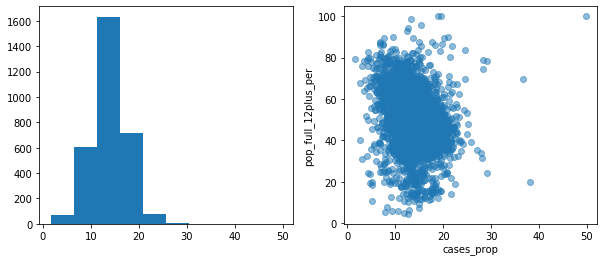

------------

FEATURE:  death_prop


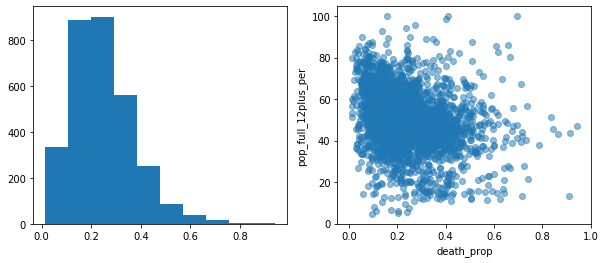

------------

FEATURE:  death_rate


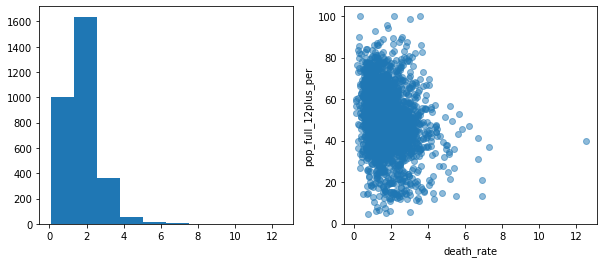

------------

FEATURE:  pop_census


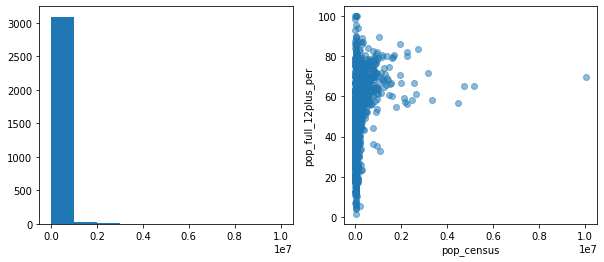

------------

FEATURE:  Estimated hesitant


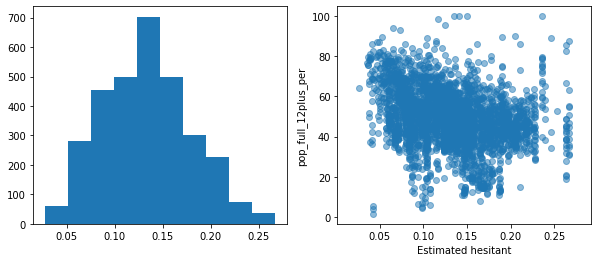

------------

FEATURE:  Estimated hesitant or unsure


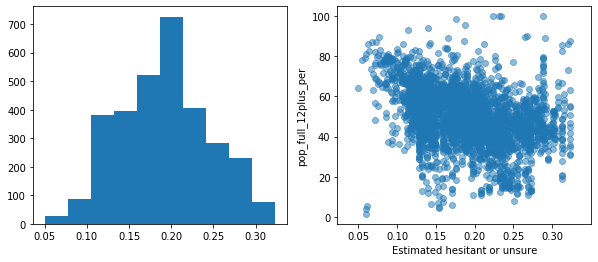

------------

FEATURE:  Estimated strongly hesitant


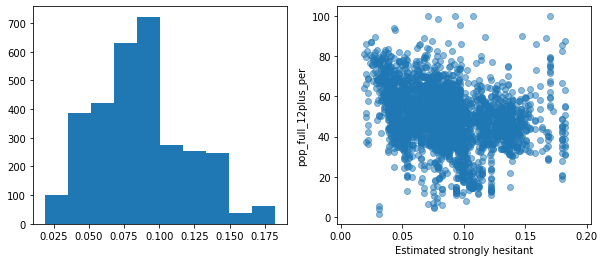

------------

FEATURE:  Social Vulnerability Index (SVI)


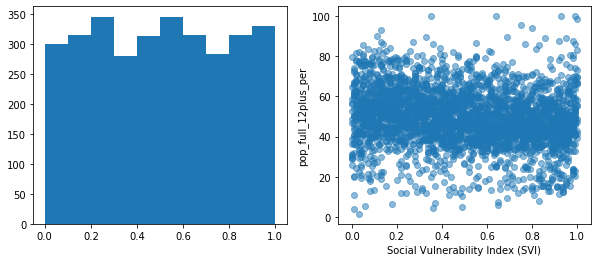

------------

FEATURE:  CVAC level of concern for vaccination rollout


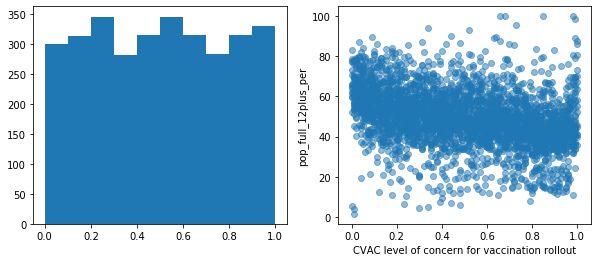

------------

FEATURE:  Percent Hispanic


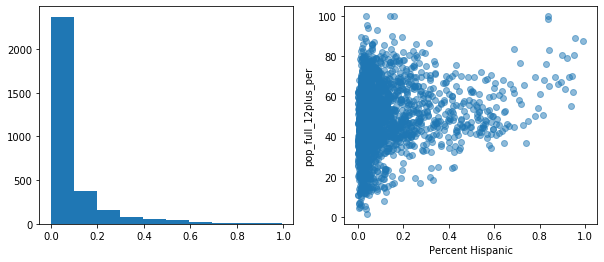

------------

FEATURE:  Percent non-Hispanic American Indian/Alaska Native


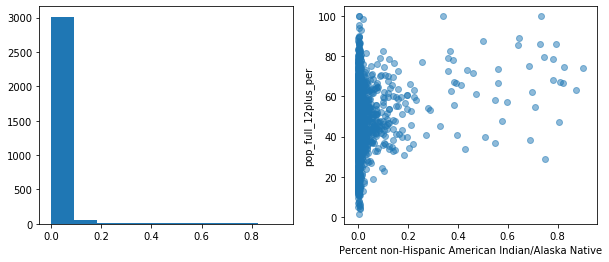

------------

FEATURE:  Percent non-Hispanic Asian


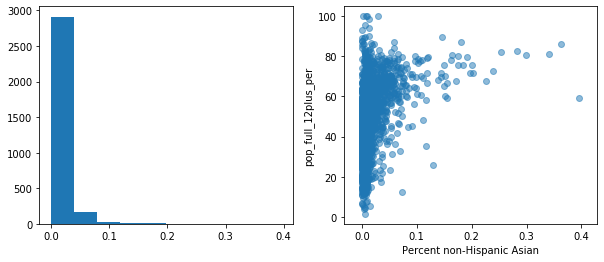

------------

FEATURE:  Percent non-Hispanic Black


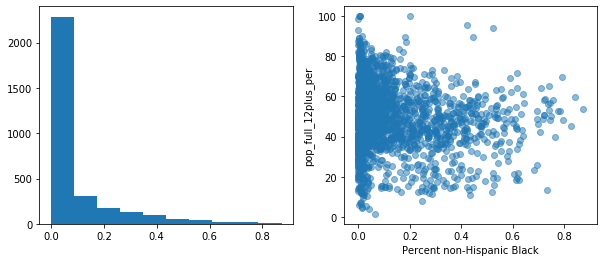

------------

FEATURE:  Percent non-Hispanic Native Hawaiian/Pacific Islander


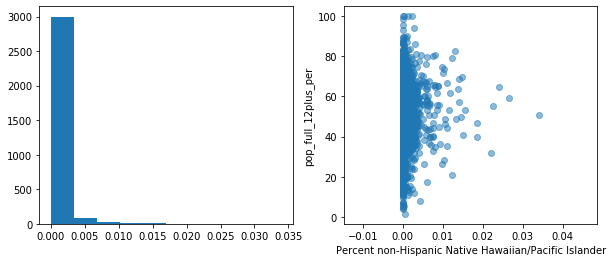

------------

FEATURE:  Percent non-Hispanic White


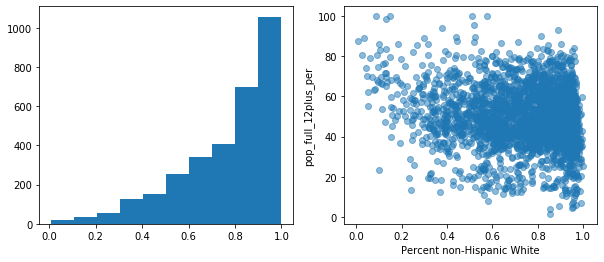

------------

FEATURE:  total_votes


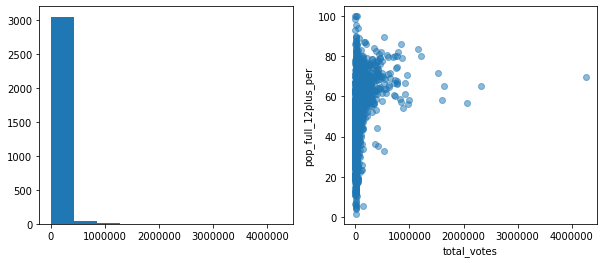

------------

FEATURE:  per_dem


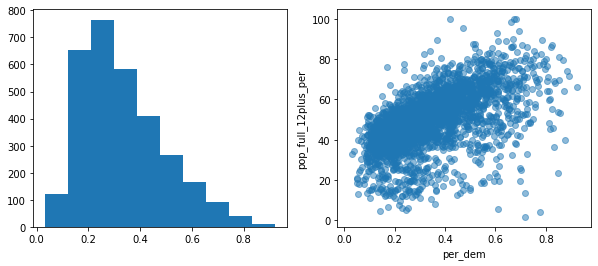

------------

FEATURE:  per_gop


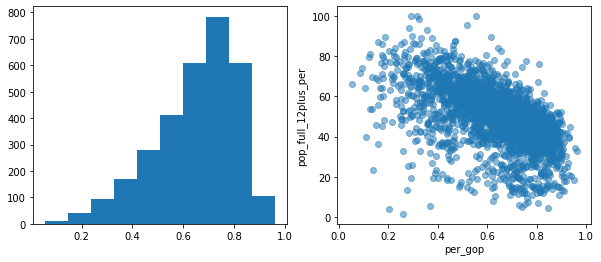

------------

FEATURE:  per_point_diff


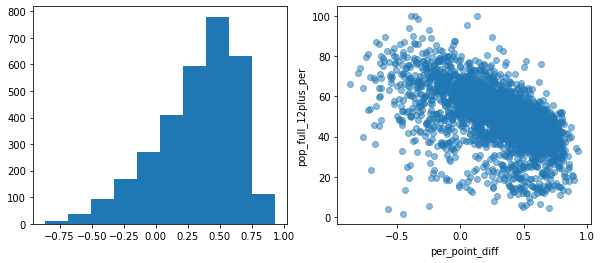

------------

FEATURE:  PrematureDeath


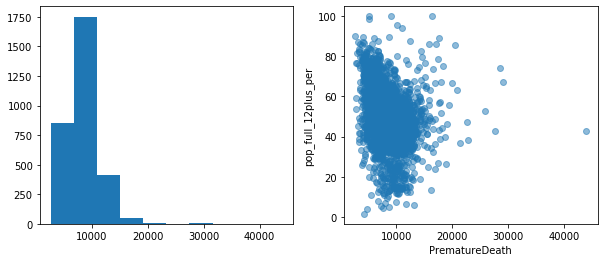

------------

FEATURE:  Smoking


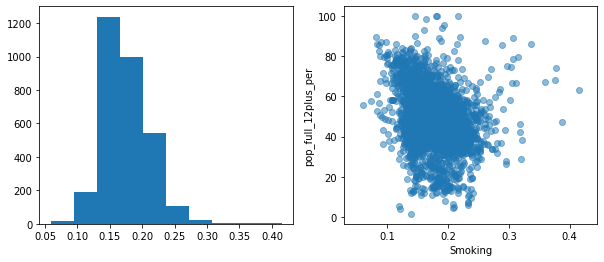

------------

FEATURE:  Testing


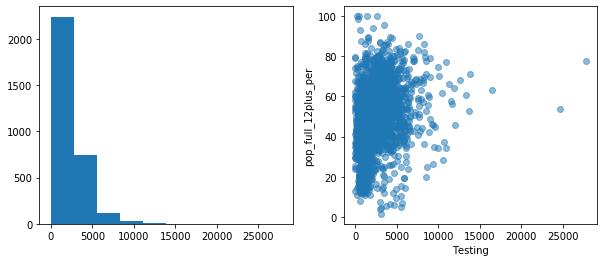

------------

FEATURE:  Traffic


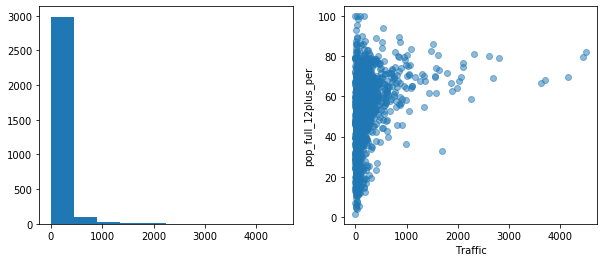

------------

FEATURE:  DaytimePopDensity


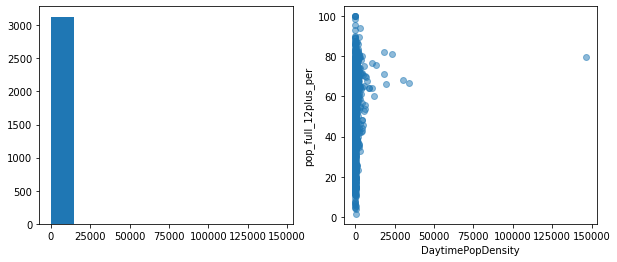

------------

FEATURE:  PctGE65


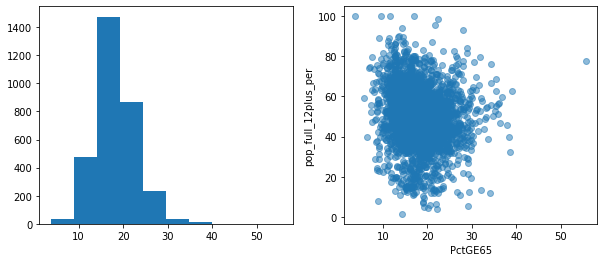

------------

FEATURE:  ToxPi Score


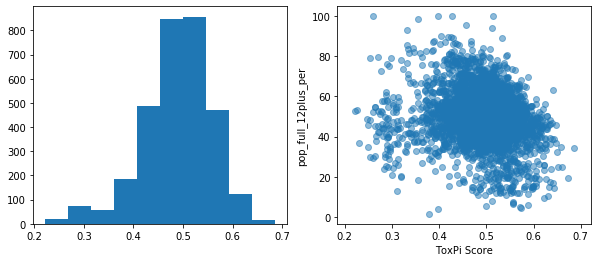

------------

FEATURE:  Male


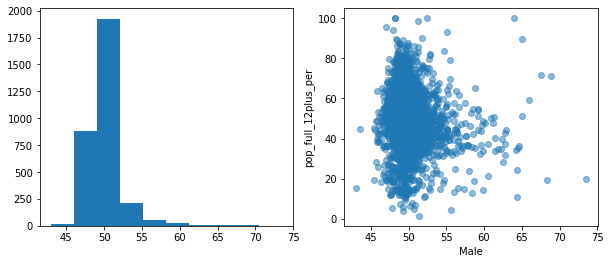

------------

FEATURE:  EconArea


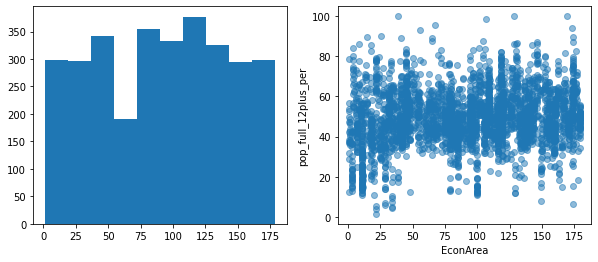

------------

FEATURE:  HouseholdSize


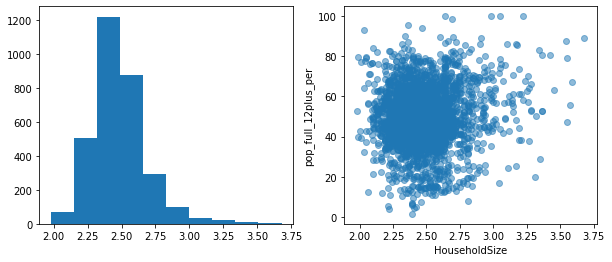

------------

FEATURE:  noHealthInsurance


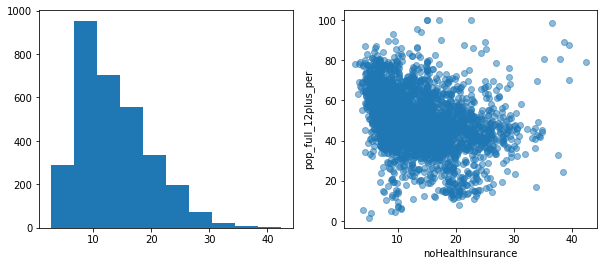

------------

FEATURE:  noHighSchool


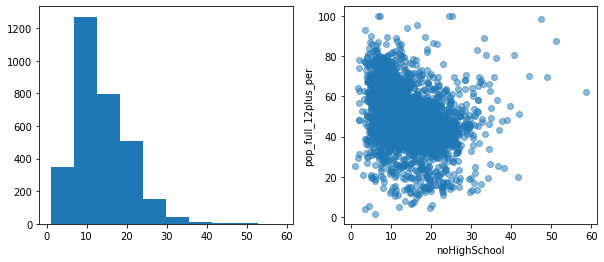

------------

FEATURE:  Poverty


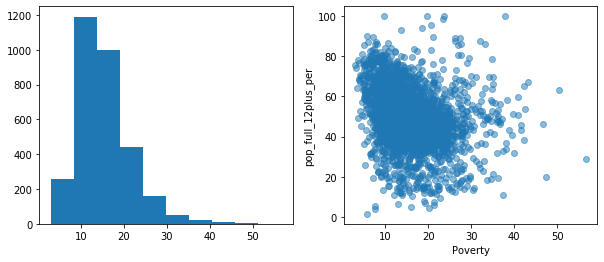

------------

FEATURE:  logPopDensity


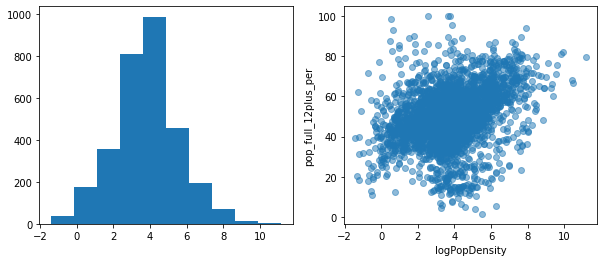

------------

FEATURE:  PercentEduHealthSoc


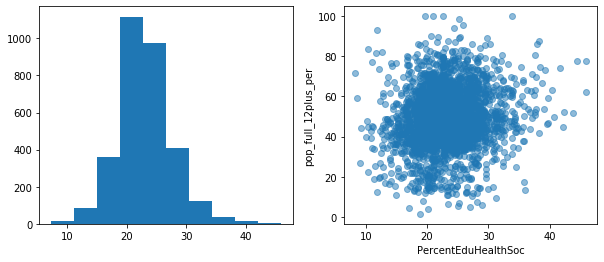

------------

FEATURE:  SES


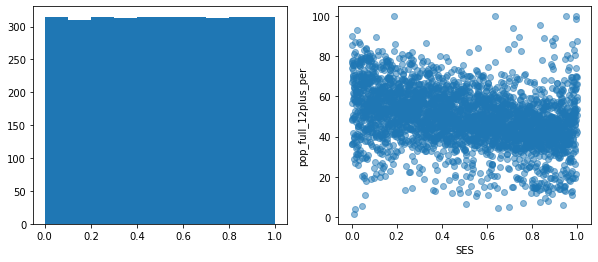

------------

FEATURE:  Household


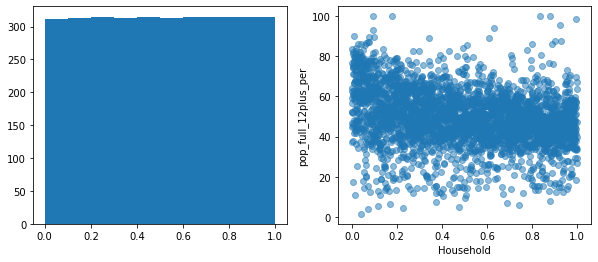

------------

FEATURE:  HousingType


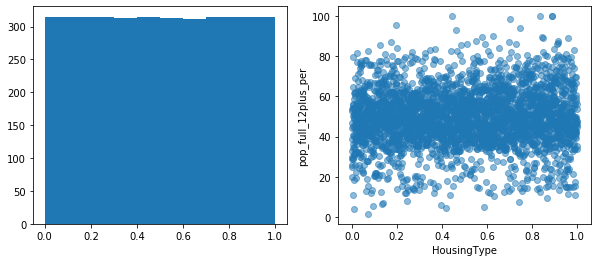

------------

FEATURE:  Asthma


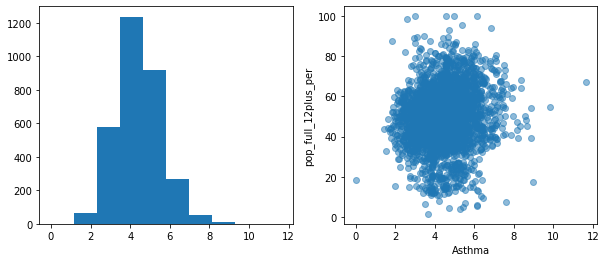

------------

FEATURE:  Cancer


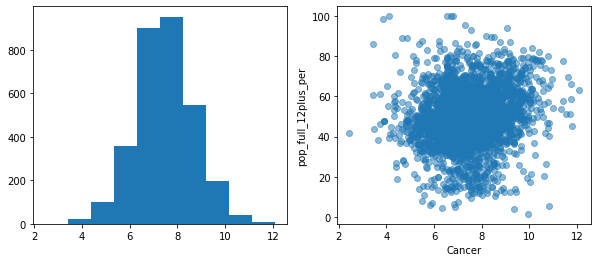

------------

FEATURE:  WBSeg


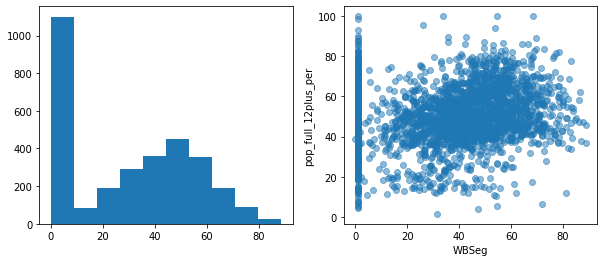

------------

FEATURE:  WNWSeg


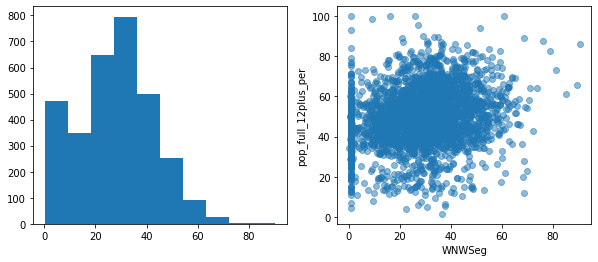

------------

FEATURE:  anycondition_prevalence


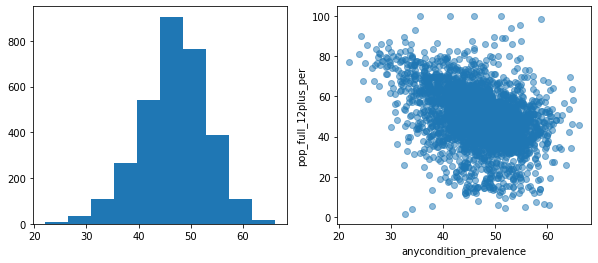

------------

FEATURE:  Obesity_prevalence


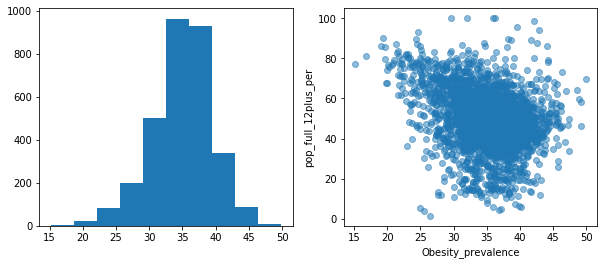

------------

FEATURE:  Heart disease_prevalence


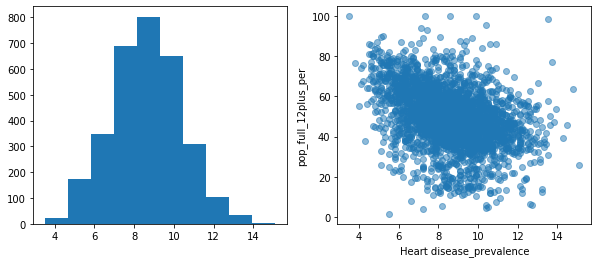

------------

FEATURE:  COPD_prevalence


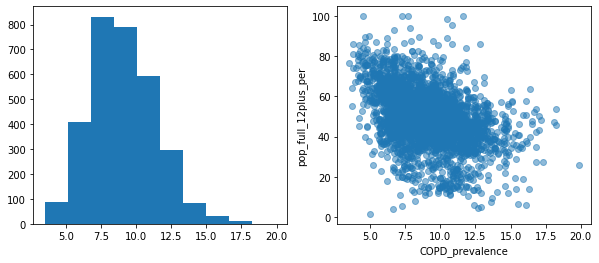

------------

FEATURE:  diabetes_prevalence


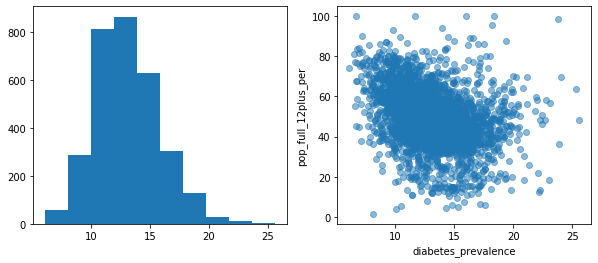

------------

FEATURE:  CKD_prevalence


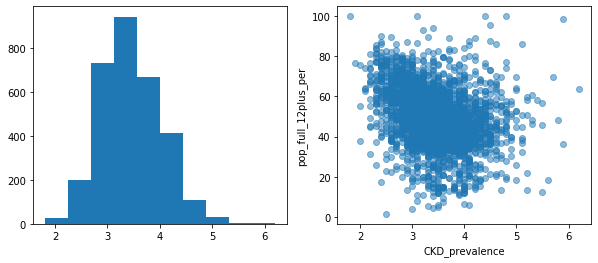

------------



In [11]:
float_col = df.select_dtypes(include=['float64']).columns

# exclude DistancingGrade, RuralCont, Urban_rural_code

for fea in float_col.drop(['pop_full_12plus_per','pop_full_18plus_per','pop_full_65plus_per']):
    
    print('FEATURE: ', fea)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(df[fea])
    
    plt.subplot(1,2,2)
    plt.scatter(df[fea], df['pop_full_12plus_per'], alpha = 0.5)
    plt.ylabel('pop_full_12plus_per'); plt.xlabel(fea)
    plt.show()
    print('------------')
    print()

### Categorical features:

- `'SVI Category'` 
- `'CVAC Level Of Concern'` 
- `DistancingGrade`
- `RuralCont`
- `Urban_rural_code`



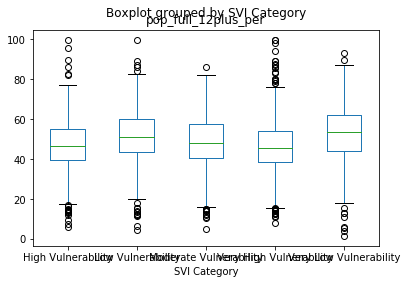

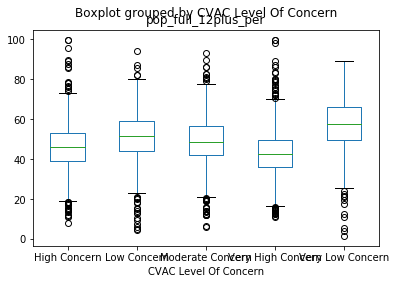

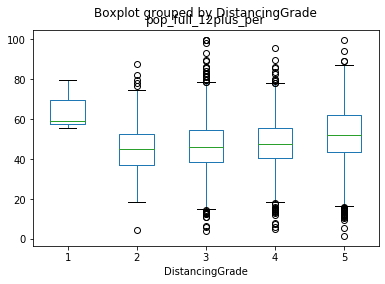

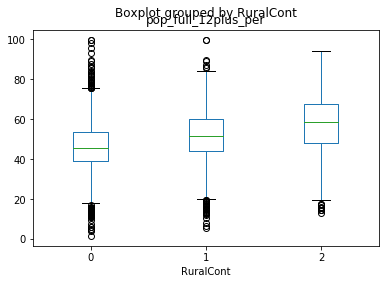

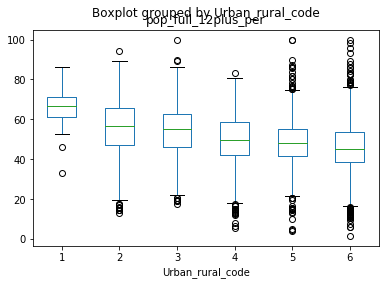

In [12]:
int_col = df.select_dtypes(include=['int64','object']).columns.drop(['fips','state', 'county', 'state_abb'])
int_col

for fea in int_col:
    
    #print('FEATURE: ', fea)
    df.boxplot(column = 'pop_full_12plus_per', by = fea, grid=False)

### Transform some of the features?:

Transformation all right skewed data (%) - won't work - Z-score; MinMax, log, sqrt.

- `Percent non-Hispanic American Indian/Alaska Native`
- `Percent non-Hispanic Asian`
- `Percent non-Hispanic Black`
- `Percent non-Hispanic Native Hawaiian/Pacific Islander`
- `Percent non-Hispanic White`
- `Traffic`
- `DaytimePopDensity`
- `HousingType`

In [13]:
df['Percent non-Hispanic Asian'].describe()

count    3137.000000
mean        0.013181
std         0.025226
min         0.000000
25%         0.002800
50%         0.006100
75%         0.012800
max         0.396300
Name: Percent non-Hispanic Asian, dtype: float64

--------
### New features:
- `prop_voted` -  proportion people who voted per county

### Repeats?
- `logPopDensity` - `pop_census`
- `per_gop`, `per_point_diff`, `total_votes`
- `Hesitant` measures
- `'CVAC Level Of Concern'` = `'CVAC level of concern for vaccination rollout'`
- `'SVI Category'` = `'Social Vulnerability Index (SVI)'`


In [14]:
df['per_voted'] = df['total_votes']/df['pop_census']

--------------
### Choose features from cov19 severity:

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


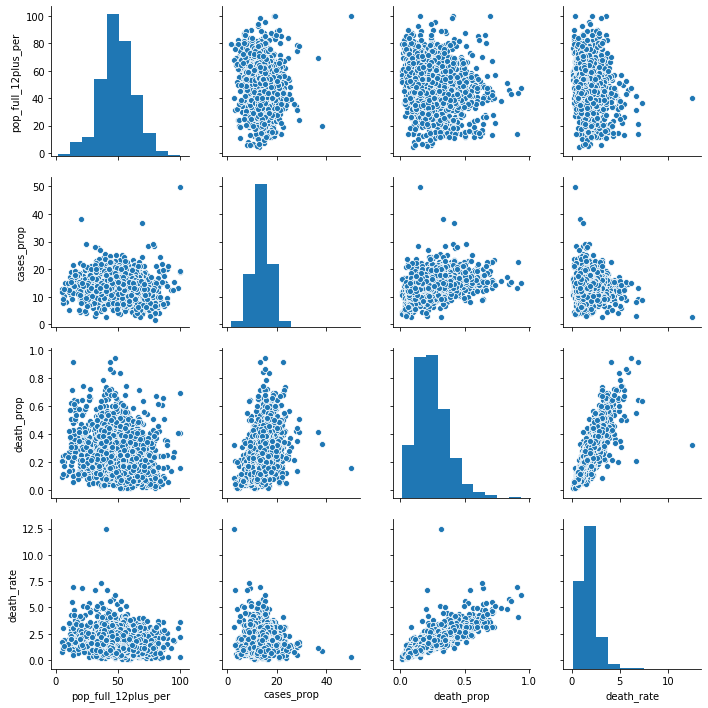

In [15]:
sns.pairplot(df[['pop_full_12plus_per','cases_prop','death_prop', 'death_rate']])
plt.show()

-----------------
### Choose a feature from the election data:

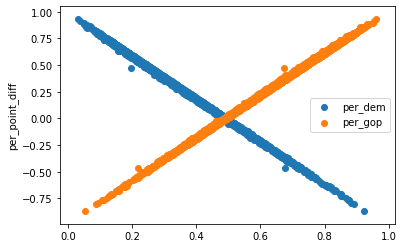

In [16]:
plt.scatter(df['per_dem'], df['per_point_diff'], label = 'per_dem')
plt.scatter(df['per_gop'], df['per_point_diff'], label = 'per_gop')
plt.ylabel('per_point_diff')
plt.legend()
plt.show()

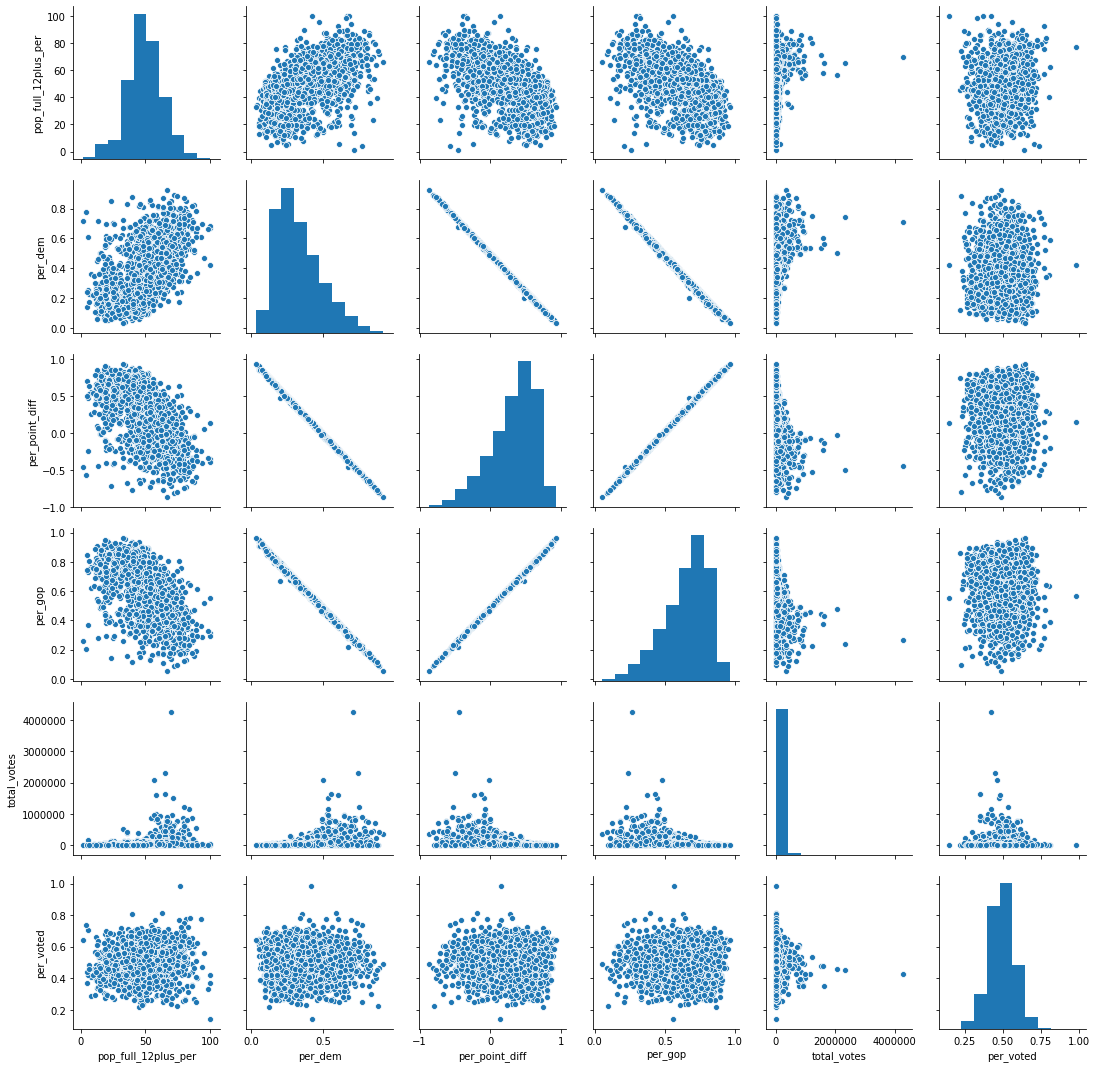

In [17]:
sns.pairplot(df[['pop_full_12plus_per','per_dem', 'per_point_diff', 'per_gop','total_votes','per_voted']])
plt.show()

-------------
### Choose features from the hesitation data:

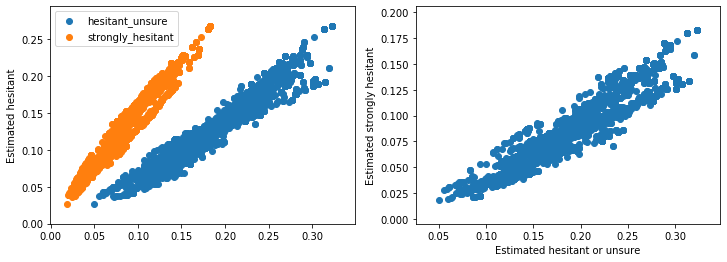

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(df['Estimated hesitant or unsure'], df['Estimated hesitant'], label = 'hesitant_unsure')
plt.scatter(df['Estimated strongly hesitant'], df['Estimated hesitant'], label = 'strongly_hesitant')
plt.ylabel('Estimated hesitant')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['Estimated hesitant or unsure'], df['Estimated strongly hesitant'], label = 'hesitant_unsure')
plt.ylabel('Estimated strongly hesitant'); plt.xlabel('Estimated hesitant or unsure')

plt.show()

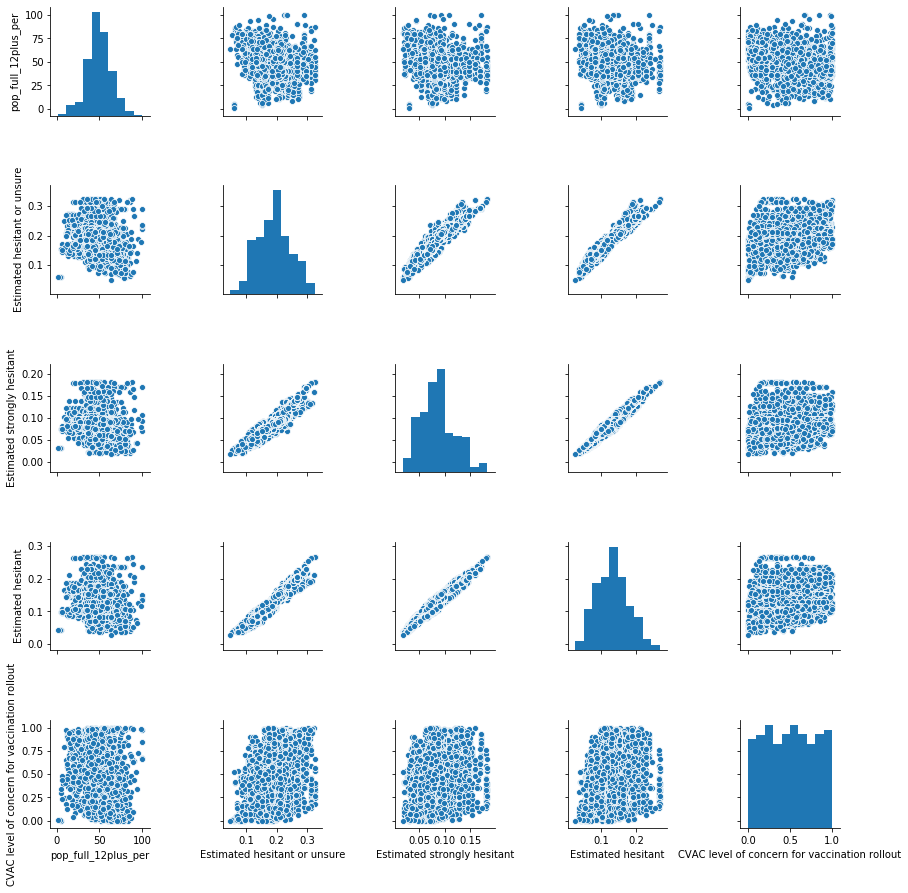

In [19]:
sns.pairplot(df[['pop_full_12plus_per','Estimated hesitant or unsure', 'Estimated strongly hesitant', 
                 'Estimated hesitant', 'CVAC level of concern for vaccination rollout']])
plt.show()

---------------------------
# Drop selected features:

- `'death_rate'`         - in favour of `'death_prop'` and `'cases_prop'`
- `'Estimated hesitant'` - highly correlated with `'Estimated hesitant or unsure', 'Estimated strongly hesitant'`
- `'SVI Category'`       - categorical, bettwe keep conitinuous.
- `'CVAC Level Of Concern'`    - categorical, better keep continuous. 
- `'per_point_diff','per_gop'` - highly (!) correlated with `'per_dem'` + `'per_voted'`
- `'HouseholdSize','Household','HousingType','PercentEduHealthSoc','EconArea'`
- `'Asthma', 'Cancer','Male'`  - no correlation with vaccination rate.
- `'PctGE65'`                  - no correlation with vaccination rate.
- `'RuralCont', 'DistancingGrade'` - in favour of `'Urban_rural_code'`, which has more categories.  


In [20]:
df.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'death_rate', 'pop_census', 'Estimated hesitant',
       'Estimated hesitant or unsure', 'Estimated strongly hesitant',
       'Social Vulnerability Index (SVI)', 'SVI Category',
       'CVAC level of concern for vaccination rollout',
       'CVAC Level Of Concern', 'Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White', 'total_votes', 'per_dem', 'per_gop',
       'per_point_diff', 'PrematureDeath', 'Smoking', 'Testing', 'Traffic',
       'DistancingGrade', 'DaytimePopDensity', 'PctGE65', 'ToxPi Score',
       'Male', 'RuralCont', 'EconArea', 'HouseholdSize', 'noHealthInsurance',
       'noHighSchool', 'Poverty', 'logPopDensity', 'PercentEdu

In [21]:
df = df.drop(columns = ['death_rate','Estimated hesitant','per_point_diff','per_gop','total_votes', 
                  'HouseholdSize','Household','HousingType','PercentEduHealthSoc','EconArea',
                  'Asthma', 'Cancer','Male','PctGE65','DistancingGrade','RuralCont'])

In [22]:
df.columns

mapping = {'Estimated hesitant or unsure': 'hesitant_unsure',
          'Estimated strongly hesitant': 'hesitant_strongly',
          'Social Vulnerability Index (SVI)': 'SVI',
          'SVI Category': 'SVI_cat',
          'CVAC level of concern for vaccination rollout': 'CVAC',
          'CVAC Level Of Concern': 'CVAC_cat',
          'Percent Hispanic': 'Hispanic (%)',
          'Percent non-Hispanic American Indian/Alaska Native': 'non-Hispanic American Indian/Alaska Native (%)',
          'Percent non-Hispanic Asian': 'non-Hispanic Asian (%)',
          'Percent non-Hispanic Black': 'non-Hispanic Black (%)',
          'Percent non-Hispanic Native Hawaiian/Pacific Islander': 'non-Hispanic Native Hawaiian/Pacific Islander (%)',
          'Percent non-Hispanic White': 'non-Hispanic White (%)'}

df.rename(columns = mapping, inplace = True)
df.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'pop_census', 'hesitant_unsure', 'hesitant_strongly',
       'SVI', 'SVI_cat', 'CVAC', 'CVAC_cat', 'Hispanic (%)',
       'non-Hispanic American Indian/Alaska Native (%)',
       'non-Hispanic Asian (%)', 'non-Hispanic Black (%)',
       'non-Hispanic Native Hawaiian/Pacific Islander (%)',
       'non-Hispanic White (%)', 'per_dem', 'PrematureDeath', 'Smoking',
       'Testing', 'Traffic', 'DaytimePopDensity', 'ToxPi Score',
       'noHealthInsurance', 'noHighSchool', 'Poverty', 'logPopDensity', 'SES',
       'WBSeg', 'WNWSeg', 'anycondition_prevalence', 'Obesity_prevalence',
       'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence',
       'CKD_prevalence', 'Urban_rural_code', 'per_voted'],
      dtype='object')

In [25]:
restruc = ['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
           'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
           'death_prop',  'hesitant_unsure', 'hesitant_strongly',
           'SVI', 'SVI_cat', 'CVAC', 'CVAC_cat', 'Hispanic (%)',
           'non-Hispanic American Indian/Alaska Native (%)',
           'non-Hispanic Asian (%)', 'non-Hispanic Black (%)',
           'non-Hispanic Native Hawaiian/Pacific Islander (%)',
           'non-Hispanic White (%)', 'noHealthInsurance', 'noHighSchool', 
           'Poverty', 'SES', 'WBSeg', 'WNWSeg', 'pop_census', 'logPopDensity', 'Urban_rural_code',
           'PrematureDeath', 'Smoking', 'anycondition_prevalence',
           'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence',
           'diabetes_prevalence', 'CKD_prevalence', 'per_dem', 'per_voted',
           'Testing', 'Traffic', 'DaytimePopDensity', 'ToxPi Score']

In [26]:
df = df[restruc]

In [27]:
df.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'hesitant_unsure', 'hesitant_strongly', 'SVI', 'SVI_cat',
       'CVAC', 'CVAC_cat', 'Hispanic (%)',
       'non-Hispanic American Indian/Alaska Native (%)',
       'non-Hispanic Asian (%)', 'non-Hispanic Black (%)',
       'non-Hispanic Native Hawaiian/Pacific Islander (%)',
       'non-Hispanic White (%)', 'noHealthInsurance', 'noHighSchool',
       'Poverty', 'SES', 'WBSeg', 'WNWSeg', 'pop_census', 'logPopDensity',
       'Urban_rural_code', 'PrematureDeath', 'Smoking',
       'anycondition_prevalence', 'Obesity_prevalence',
       'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence',
       'CKD_prevalence', 'per_dem', 'per_voted', 'Testing', 'Traffic',
       'DaytimePopDensity', 'ToxPi Score'],
      dtype='object')

In [28]:
full_corr = df.select_dtypes(include=['float64']).corr(method = 'spearman')
corr_02 = full_corr.where(-((full_corr < 0.2) & (full_corr > -0.2)))

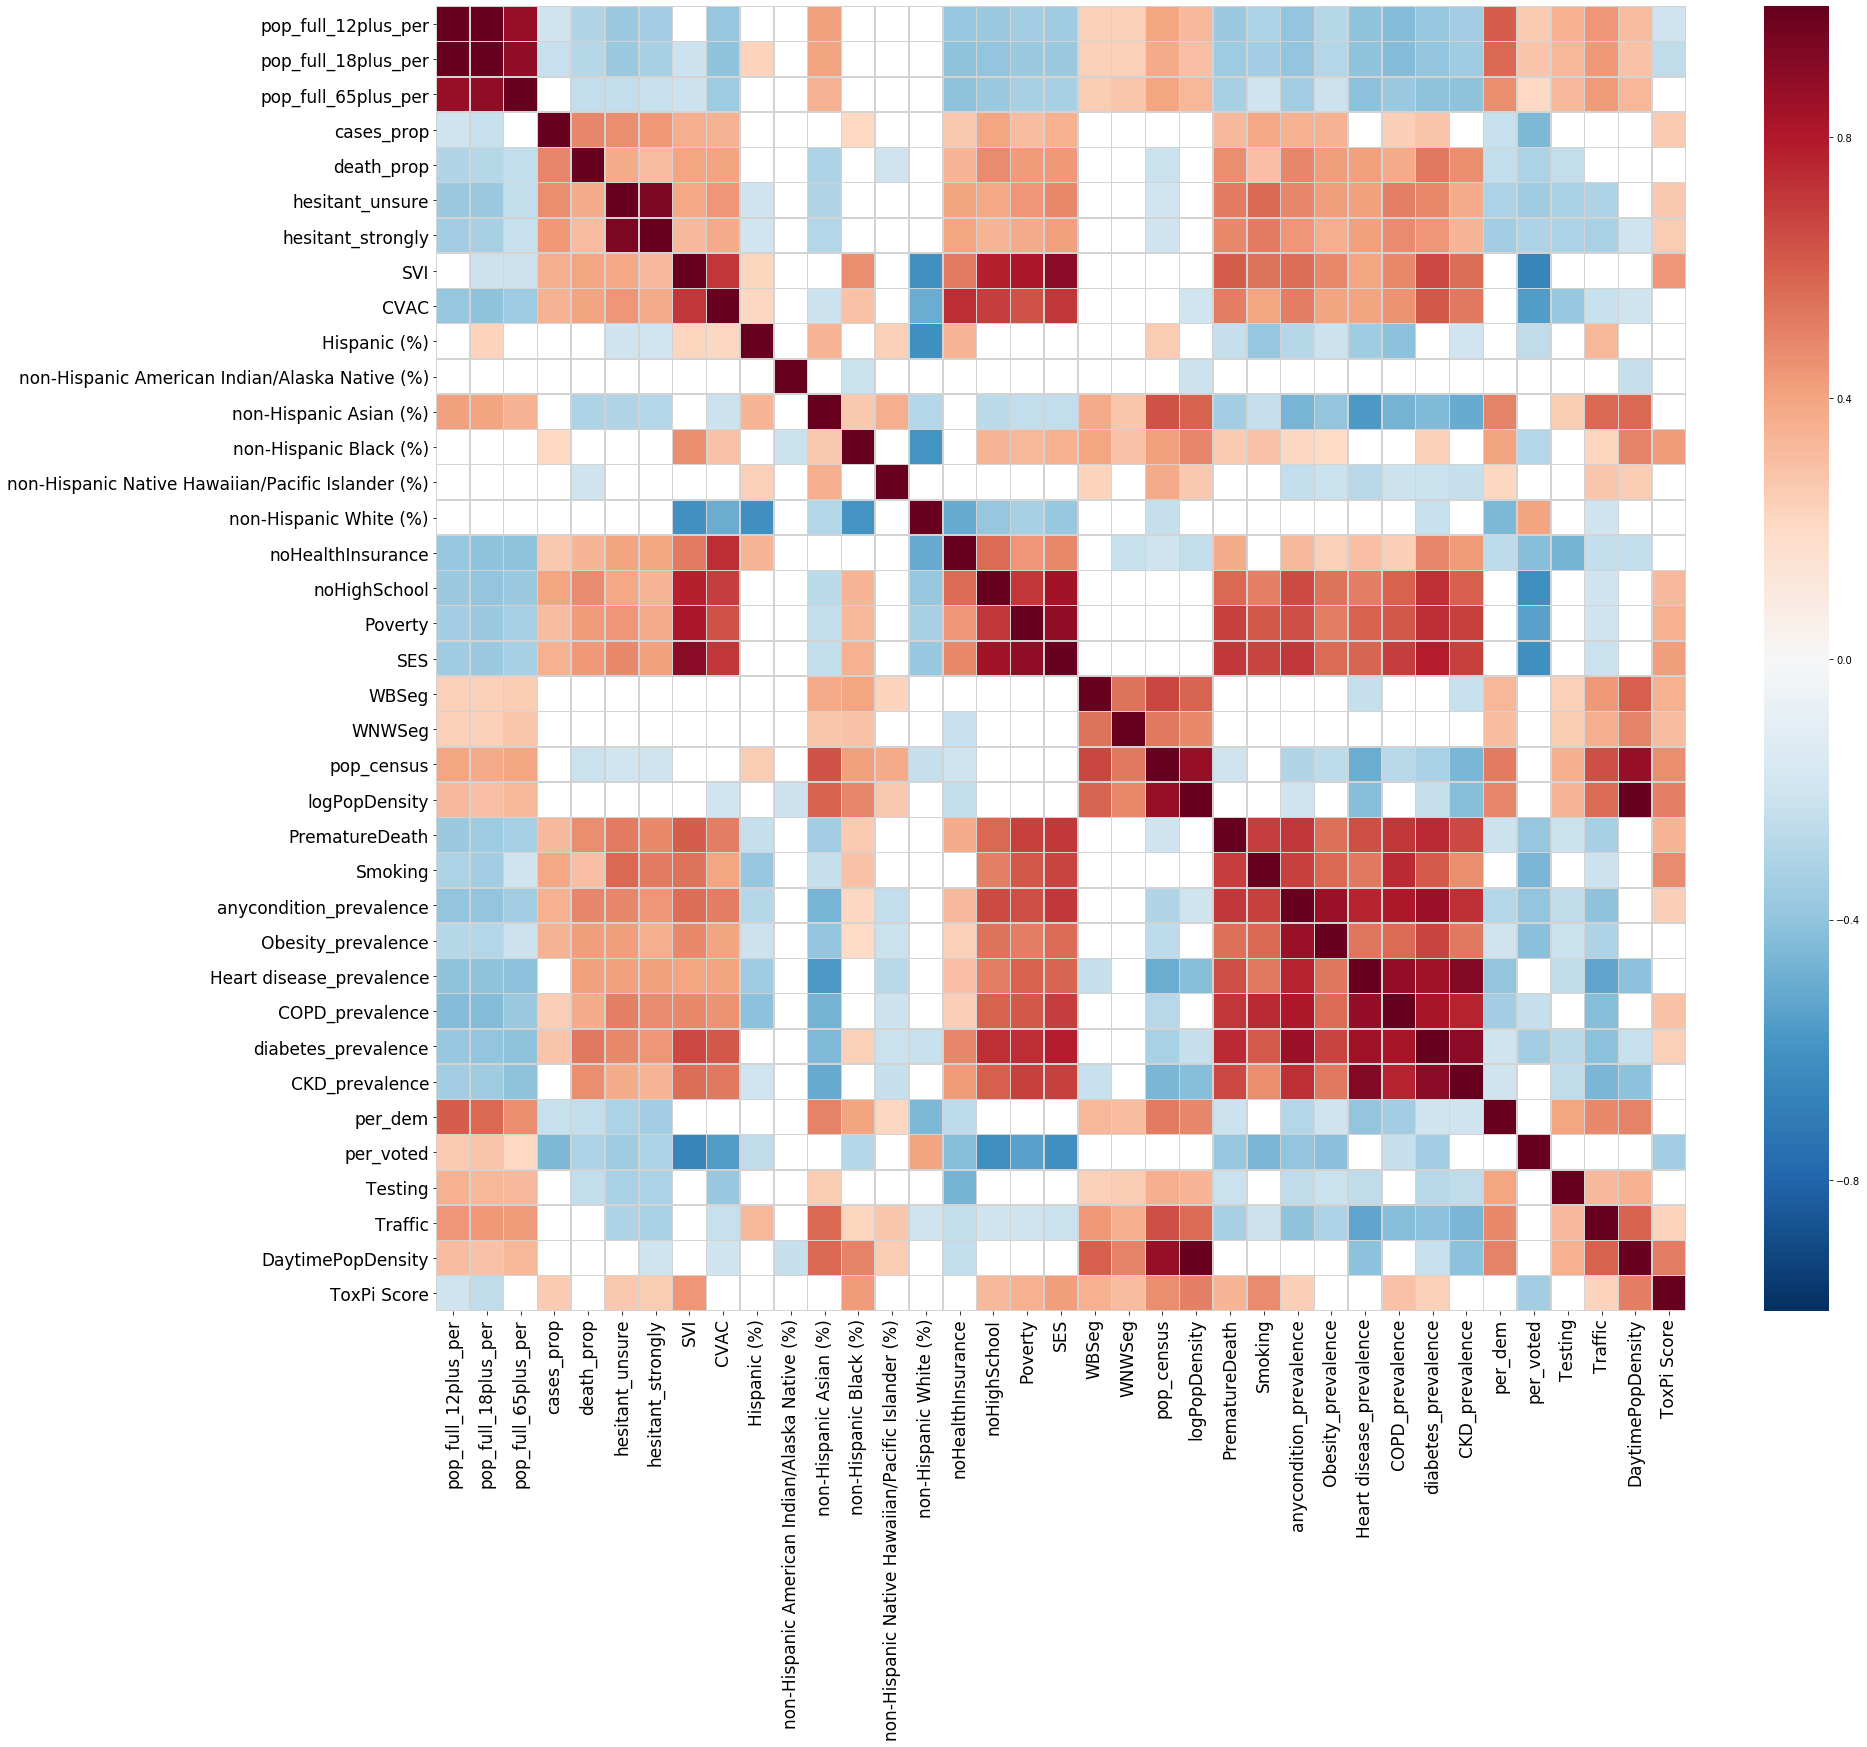

In [57]:
plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(corr_02, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey',
                      vmin = -1, vmax = 1,)
ax.tick_params(axis='both', which='major', labelsize = 17)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Heatmap `pop_full_12plus_per`:

<Figure size 2016x1728 with 0 Axes>

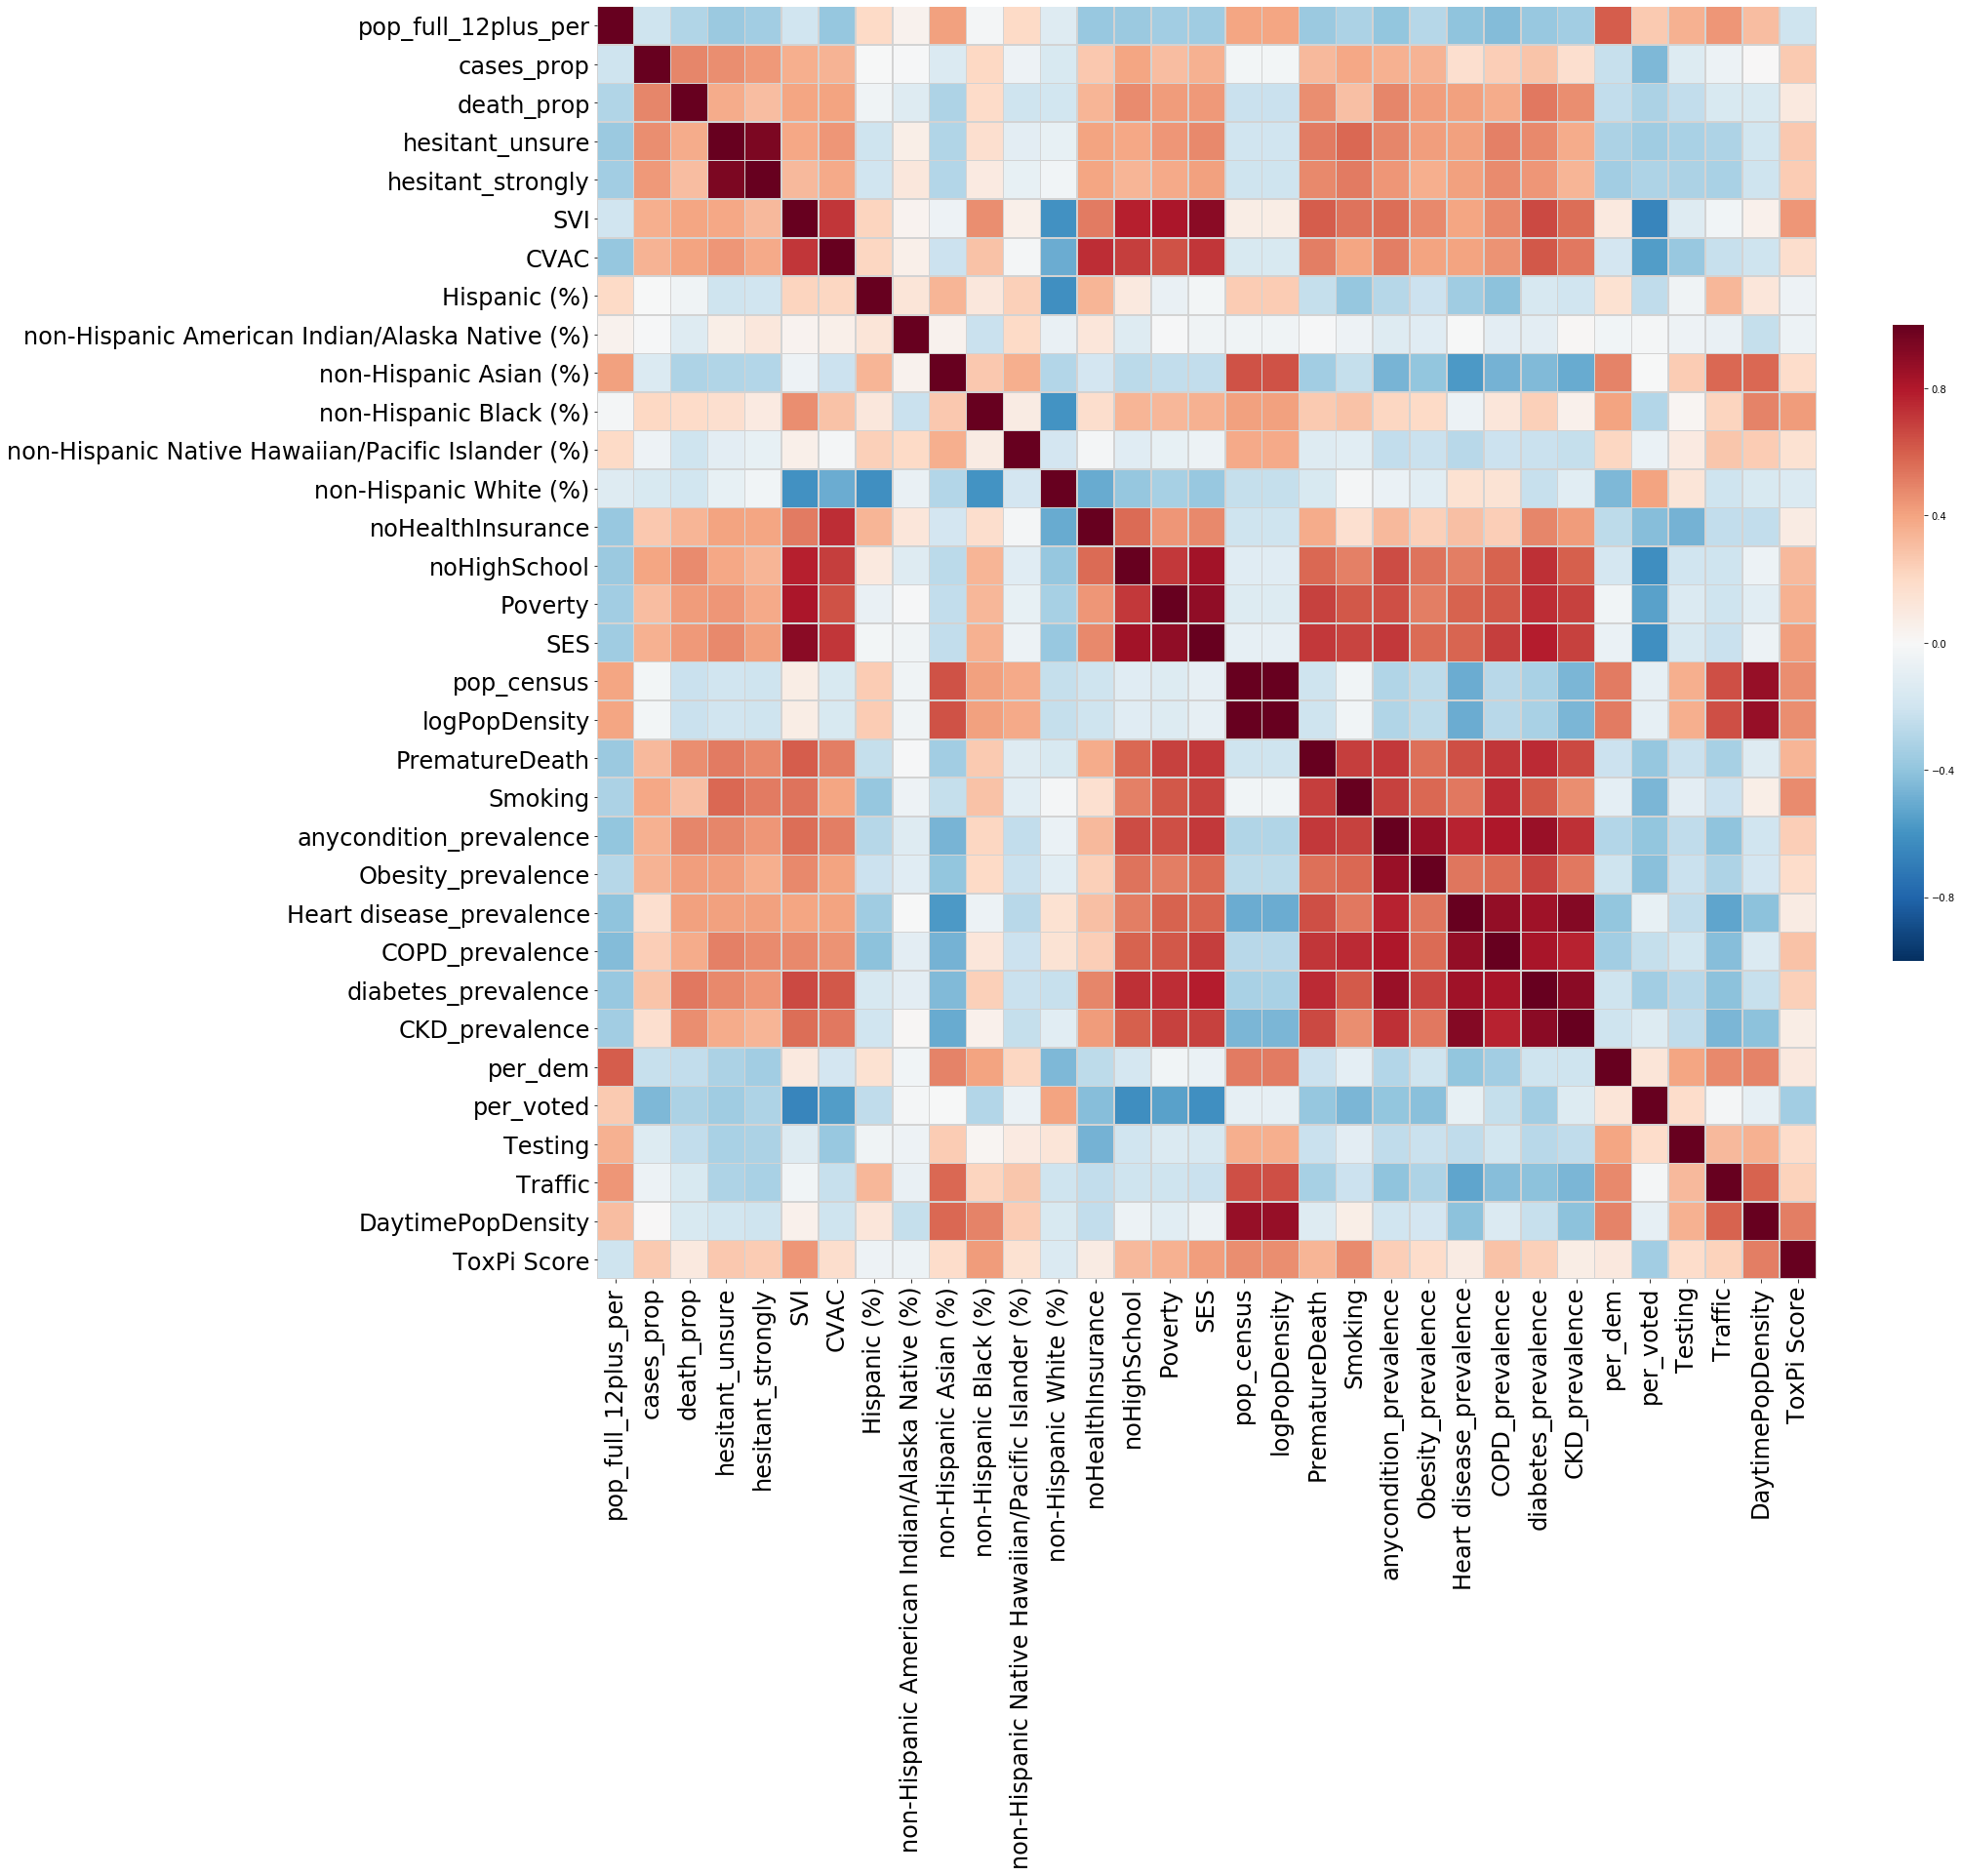

In [111]:
plt.figure(figsize = (28, 24))

full_corr_12 = df.select_dtypes(include = ['float64']).drop(columns = ['pop_full_18plus_per',
                               'pop_full_65plus_per', 'WBSeg', 'WNWSeg']).corr(method = 'spearman')

corr_02 = full_corr_12.where(-((full_corr_12 < 0.2) & (full_corr_12 > -0.2)))

plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr_12, 
                      cmap = reversed_col, linewidths = 0.6,
                      cbar_kws={"shrink": 0.5},
                      vmin = -1, vmax = 1,
                      linecolor = 'lightgrey')
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig(dd + '/plots/heatmap_12plus.png', bbox_inches = 'tight', dpi = 200)
plt.show()

## Heatmap `pop_full_18plus_per`:

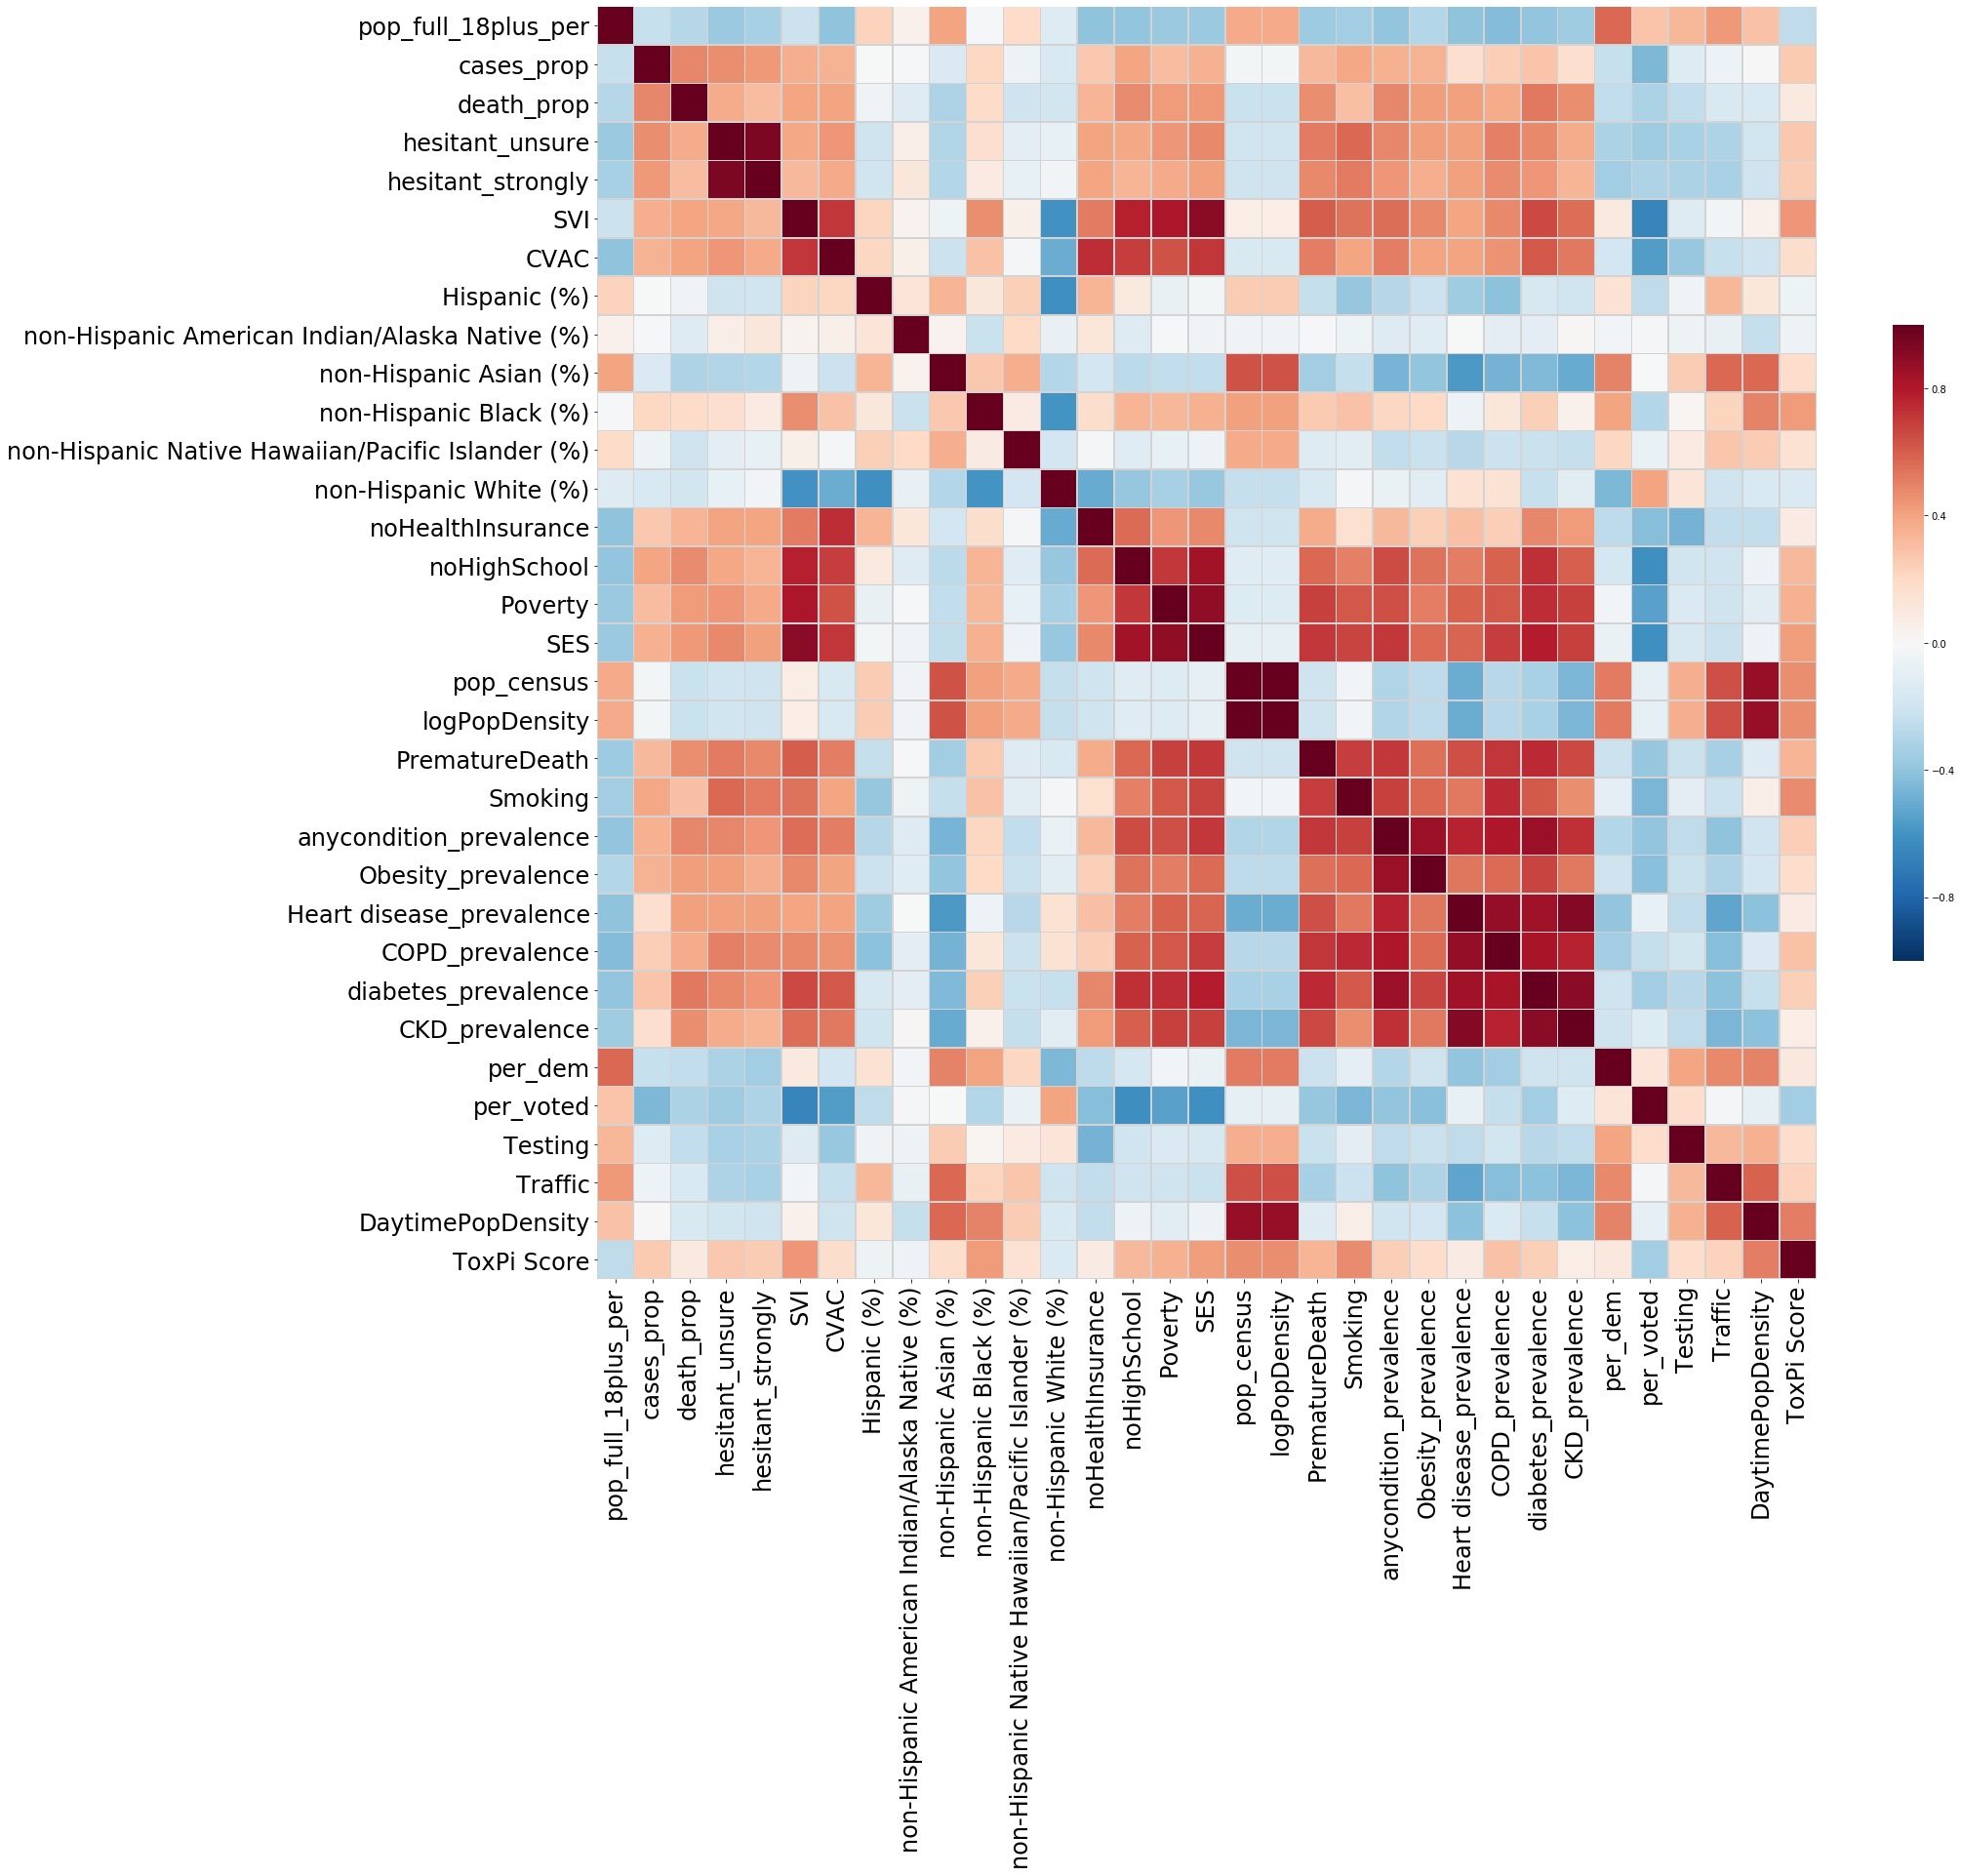

In [109]:
full_corr_18 = df.select_dtypes(include = ['float64']).drop(columns = ['pop_full_12plus_per',
                               'pop_full_65plus_per', 'WBSeg', 'WNWSeg']).corr(method = 'spearman')

plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr_18, 
                      cmap = reversed_col, linewidths = 0.6,
                      cbar_kws={"shrink": 0.5},
                      vmin = -1, vmax = 1,
                      linecolor = 'lightgrey')
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Heatmap `pop_full_65plus_per`:

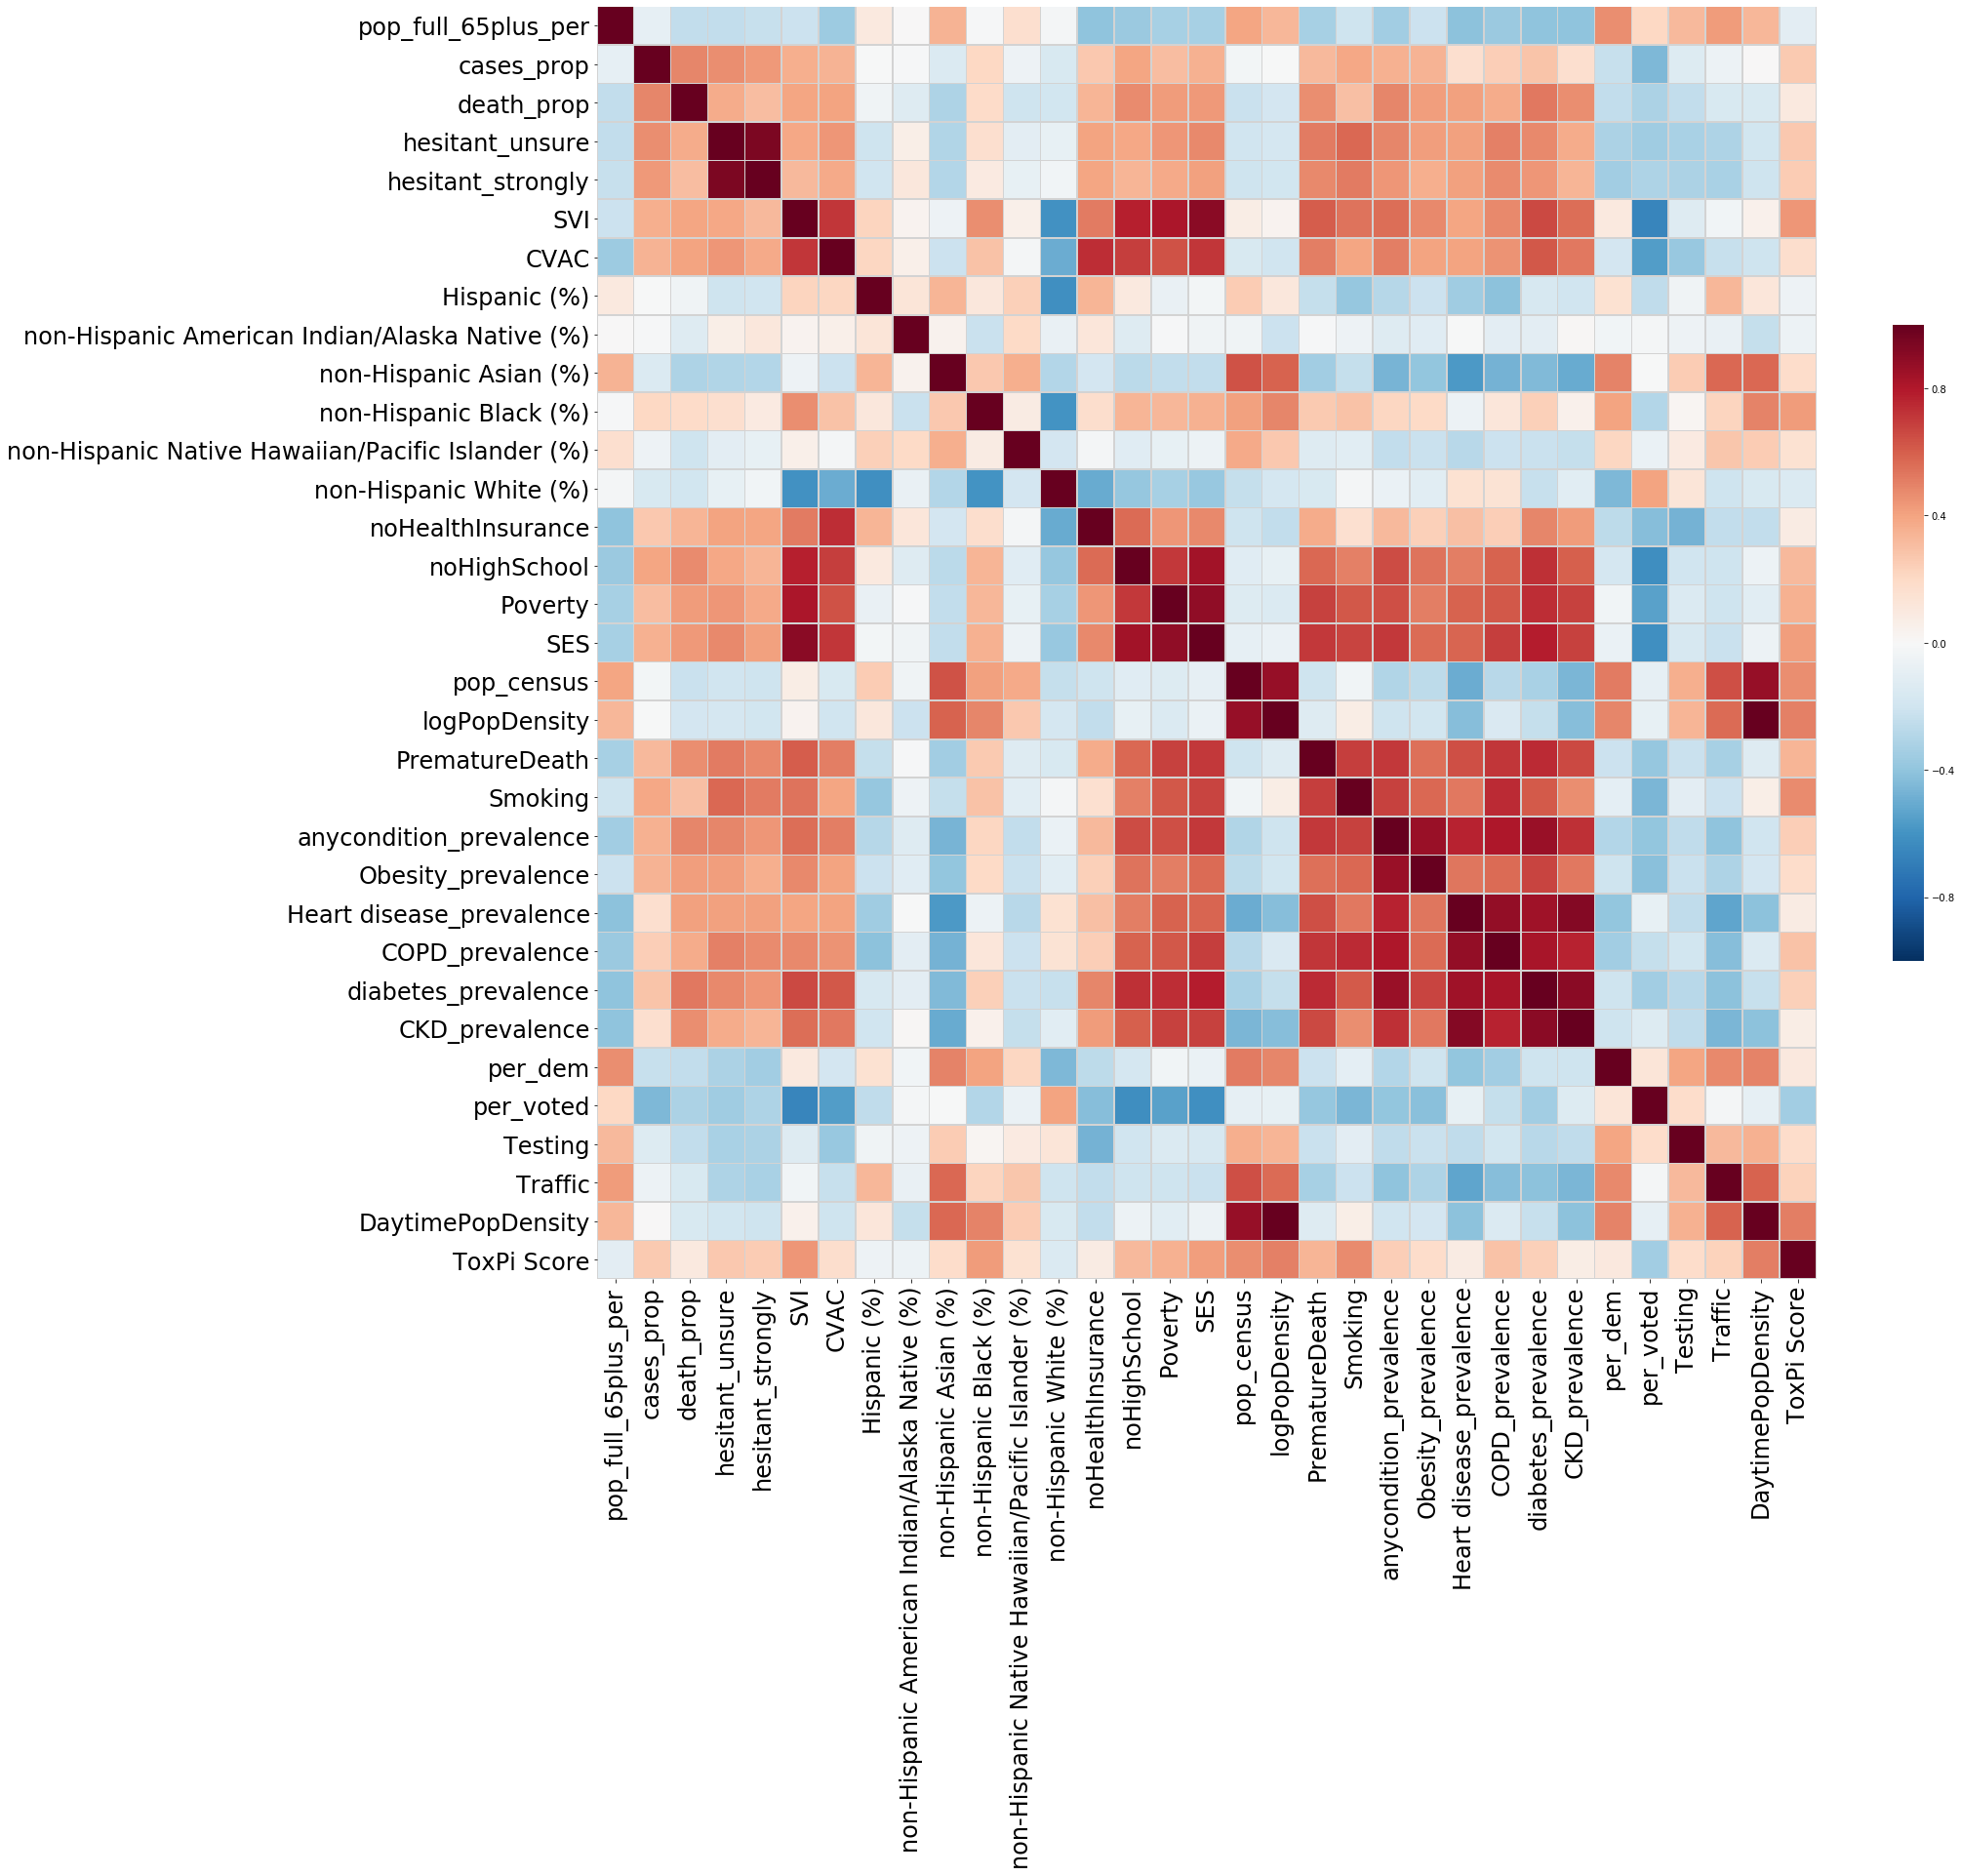

In [77]:
full_corr_65 = df.select_dtypes(include = ['float64']).drop(columns = ['pop_full_12plus_per',
                               'pop_full_18plus_per', 'WBSeg', 'WNWSeg']).corr(method = 'spearman')

plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr_65, 
                      cmap = reversed_col, linewidths = 0.6,
                      cbar_kws={"shrink": 0.5},
                      vmin = -1, vmax = 1,
                      linecolor = 'lightgrey')
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [107]:
df['logPopDensity'] = np.log(df['pop_census'])

In [108]:
df.isnull().sum()

fips                                                   0
state                                                  0
county                                                 0
state_abb                                              0
pop_full_12plus_per                                   53
pop_full_18plus_per                                  262
pop_full_65plus_per                                    8
cases_prop                                            27
death_prop                                            55
hesitant_unsure                                        0
hesitant_strongly                                      0
SVI                                                    1
SVI_cat                                                1
CVAC                                                   0
CVAC_cat                                               0
Hispanic (%)                                           0
non-Hispanic American Indian/Alaska Native (%)         0
non-Hispanic Asian (%)         

## Save new file:

In [114]:
df.columns

Index(['fips', 'state', 'county', 'state_abb', 'pop_full_12plus_per',
       'pop_full_18plus_per', 'pop_full_65plus_per', 'cases_prop',
       'death_prop', 'hesitant_unsure', 'hesitant_strongly', 'SVI', 'SVI_cat',
       'CVAC', 'CVAC_cat', 'Hispanic (%)',
       'non-Hispanic American Indian/Alaska Native (%)',
       'non-Hispanic Asian (%)', 'non-Hispanic Black (%)',
       'non-Hispanic Native Hawaiian/Pacific Islander (%)',
       'non-Hispanic White (%)', 'noHealthInsurance', 'noHighSchool',
       'Poverty', 'SES', 'WBSeg', 'WNWSeg', 'pop_census', 'logPopDensity',
       'Urban_rural_code', 'PrematureDeath', 'Smoking',
       'anycondition_prevalence', 'Obesity_prevalence',
       'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence',
       'CKD_prevalence', 'per_dem', 'per_voted', 'Testing', 'Traffic',
       'DaytimePopDensity', 'ToxPi Score'],
      dtype='object')

In [112]:
df.to_csv(dd + 'data_after_final_EDA.csv', index = False)

---------
## Segregation measures:

County residential racial segregation indices of dissimilarity were obtained from County Health Rankings & Roadmaps. These indices were originally calculated from data from US Census tracts from the American Community Survey 2014–2018. Counties with less than 100 Black/non-white residents had the index of dissimilarity set to be equal to 1.

`Index of dissimilarity where higher values indicate greater residential segregation between Black and White county residents.`

- `'WBSeg'` - White Black Segregation Index 2014-2018 County Health Rankings & Roadmaps
- `'WNWSeg'` - White non-White Segregation Index 2014-2018 County Health Rankings & Roadmaps


Look at ethnically diverse counties? 

- `'WBSeg'` > 1 - 2064 counties
- `'WNWSeg'` > 1 - 2780 counties.

[Original source](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/social-and-economic-factors/family-social-support/residential-segregation-blackwhite): `Residential segregation remains prevalent in many areas of the country and may influence both personal and community well-being. Residential segregation of Black and White residents is considered a fundamental cause of health disparities in the US and has been linked to poor health outcomes, including mortality, a wide variety of reproductive, infectious, and chronic diseases, and other adverse conditions.[2,3] Structural racism is also linked to poor-quality housing and disproportionate exposure to environmental toxins.[4] Individuals living in segregated neighborhoods often experience increased violence, reduced educational and employment opportunities, limited access to quality health care and restrictions to upward mobility.[3,4]`


`Residential Segregation – Black/White is an Index`

Racial/ethnic residential segregation refers to the degree to which two or more groups live separately from one another in a geographic area. The index of dissimilarity is a demographic measure of the evenness with which two groups (Black and White residents, in this case) are distributed across the component geographic areas (census tracts, in this case) that make up a larger area (counties, in this case).

The residential segregation index ranges from 0 (complete integration) to 100 (complete segregation). The index score can be interpreted as the percentage of either Black or White residents that would have to move to different geographic areas in order to produce a distribution that matches that of the larger area.

A missing value is reported for counties with Black population less than 100 in the time frame.

The Black/White residential segregation measure is only available for counties with a Black population of at least 100 (applies to approximately 65% of US counties).

This measure is a reflection of racial and not ethnic discrimination.

In [87]:
df_segr = df.loc[df['WBSeg'] > 1] 

In [88]:
df.loc[df['WNWSeg'] > 1]

fips    state             county state_abb  pop_full_12plus_per  \
0      1001  Alabama     Autauga County        AL                 39.9   
1      1003  Alabama     Baldwin County        AL                 49.5   
2      1005  Alabama     Barbour County        AL                 41.1   
3      1007  Alabama        Bibb County        AL                 34.2   
4      1009  Alabama      Blount County        AL                 31.0   
...     ...      ...                ...       ...                  ...   
3132  56037  Wyoming  Sweetwater County        WY                 43.9   
3133  56039  Wyoming       Teton County        WY                 89.9   
3134  56041  Wyoming       Uinta County        WY                 48.1   
3135  56043  Wyoming    Washakie County        WY                 40.3   
3136  56045  Wyoming      Weston County        WY                 35.3   

      pop_full_18plus_per  pop_full_65plus_per  cases_prop  death_prop  \
0                    41.8                 61.7   17.505235    0.254166   
1                    51.9                 75.3   16.385945    0.232044   
2                    43.0                 66.1   14.255043    0.287612   
3                    35.7                 57.0   18.563008    0.370635   
4                    32.9                 49.5   17.068447    0.280151   
...                   ...                  ...         ...         ...   
3132                 46.9                 81.1   16.434830    0.153508   
3133                 90.8                 85.8   21.066314    0.055404   
3134                 51.7                 77.7   17.551666    0.123603   
3135                 43.7                 72.9   17.911595    0.345932   
3136                 37.7                 65.8   13.137000    0.115490   

      hesitant_unsure  ...  Heart disease_prevalence  COPD_prevalence  \
0              0.2233  ...                       7.9              8.6   
1              0.1988  ...                       7.8              8.6   
2              0.2337  ...                      11.0             12.1   
3              0.2526  ...                       8.6             10.0   
4              0.2362  ...                       9.2             10.5   
...               ...  ...                       ...              ...   
3132           0.2843  ...                       5.9              6.6   
3133           0.2671  ...                       5.2              4.9   
3134           0.2843  ...                       7.2              8.0   
3135           0.2943  ...                       8.2              8.3   
3136           0.2943  ...                       8.5              8.7   

     diabetes_prevalence  CKD_prevalence   per_dem  per_voted  Testing  \
0                   12.9             3.1  0.270184   0.497056   1271.0   
1                   12.0             3.2  0.224090   0.491319   1399.0   
2                   19.7             4.5  0.457882   0.426071    689.0   
3                   14.1             3.3  0.206983   0.428463   1992.0   
4                   13.5             3.4  0.095694   0.477086   1371.0   
...                  ...             ...       ...        ...      ...   
3132                 8.9             2.6  0.230260   0.392107   2451.0   
3133                 7.2             2.4  0.670982   0.625511   7663.0   
3134                10.4             3.0  0.169219   0.464847   2620.0   
3135                11.3             3.4  0.162263   0.514029   4471.0   
3136                11.7             3.4  0.101637   0.511332   4533.0   

         Traffic  DaytimePopDensity  ToxPi Score  
0      88.457040               76.0     0.531549  
1      86.997430              121.0     0.510690  
2     102.291762               27.5     0.595956  
3      29.335580               28.9     0.539207  
4      33.411782               71.7     0.493368  
...          ...                ...          ...  
3132  154.754714                4.5     0.544375  
3133  135.188600                6.7     0.403088  
3134

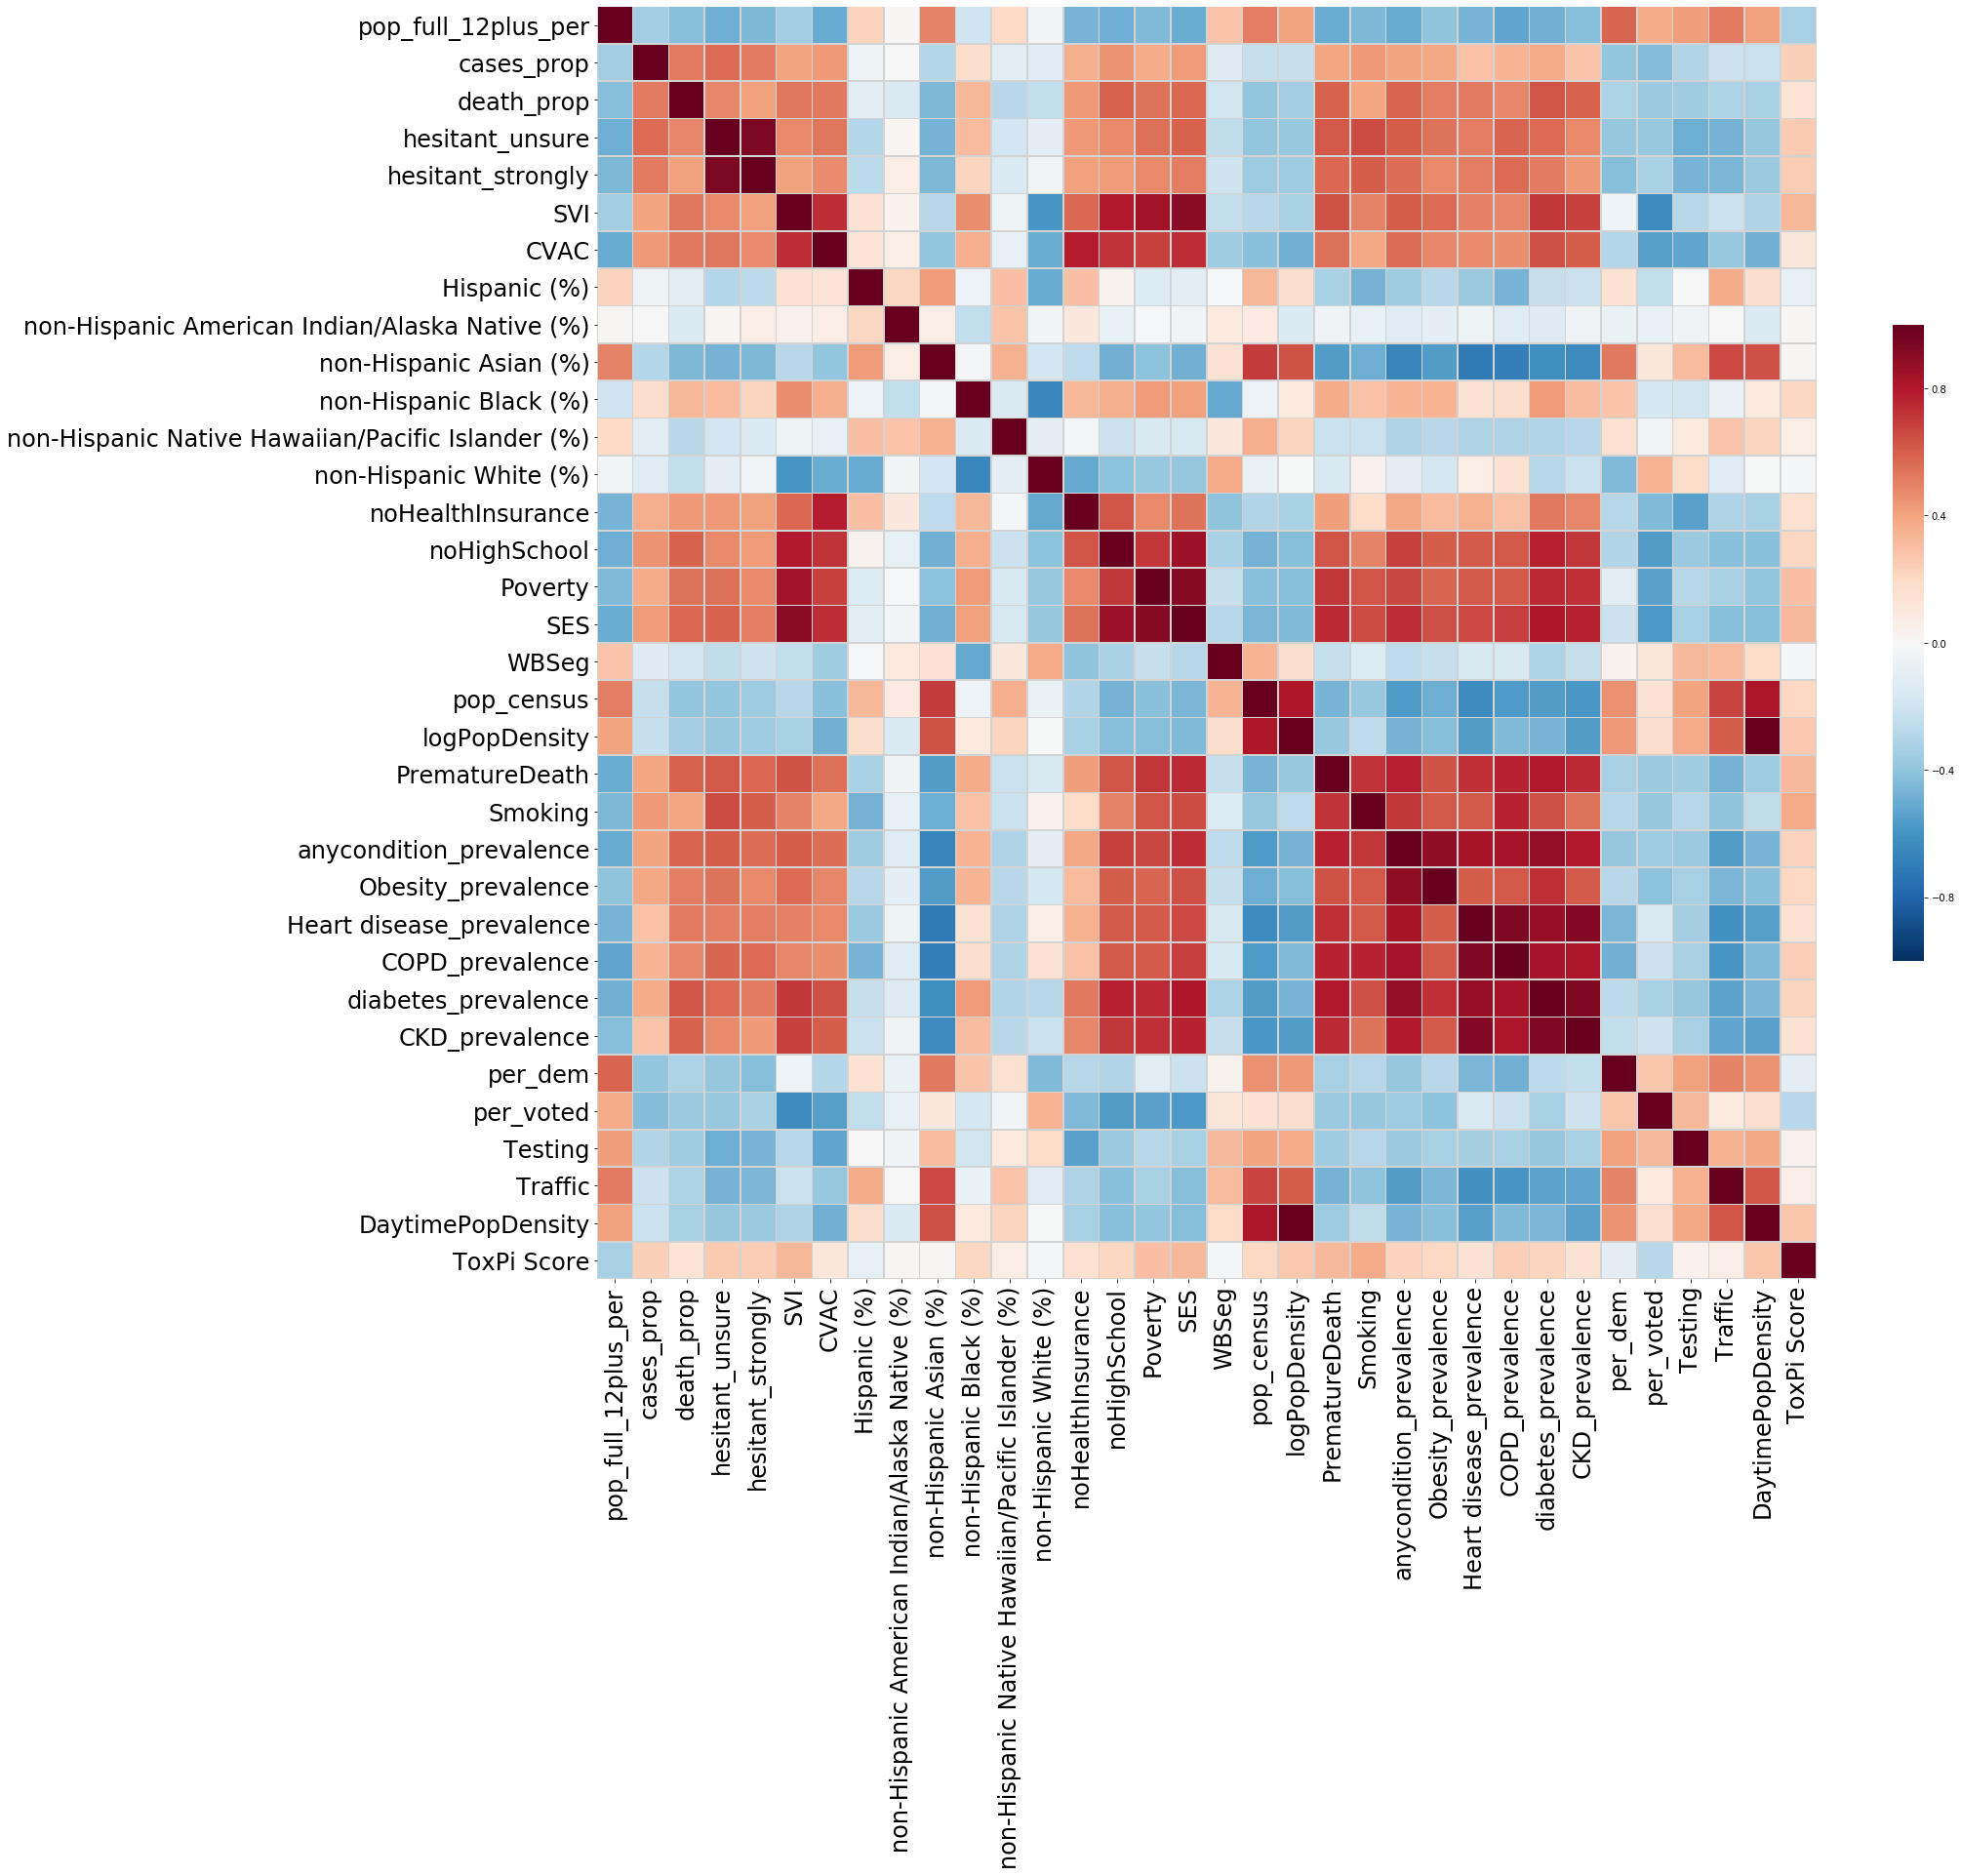

In [89]:
segr_12 = df_segr.select_dtypes(include = ['float64']).drop(columns = ['pop_full_18plus_per',
                               'pop_full_65plus_per', 'WNWSeg']).corr(method = 'spearman')

plt.figure(figsize = (28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(segr_12, 
                      cmap = reversed_col, linewidths = 0.6,
                      cbar_kws={"shrink": 0.5},
                      vmin = -1, vmax = 1,
                      linecolor = 'lightgrey')
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

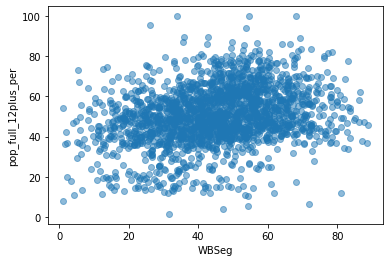

In [92]:
plt.scatter(df_segr['WBSeg'], df_segr['pop_full_12plus_per'], alpha = 0.5)
plt.xlabel('WBSeg'); plt.ylabel('pop_full_12plus_per')
plt.show()

----------

### `Features to further discuss`:

- `'WBSeg','WNWSeg'` - index available for a fraction of the counties.
- `'SVI Category'`       - categorical, should only keep conitinuous?
- `'CVAC Level Of Concern'`    - categorical, should only keep continuous?
- `*_prevalence` - highly correlated, which to keep?
- `'Testing','Traffic','DaytimePopDensity', 'ToxPi Score'` - daily indices
- `'SVI','noHealthInsurance','noHighSchool','Poverty','SES'` - highly correlated with each other.
- `'pop_census', 'logPopDensity','DaytimePopDensity'` - highly correlated.


other:
- exclude `Alaska`?


In [ ]:
df = pd.read_csv(dd + 'data_after_final_EDA.csv')